# Banking Dataset Classification

# About Dataset

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

# Data Set Information

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets: train.csv with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

In [1]:
#Lets import the necessory libraries
import pandas as pd
import numpy as np

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets load the dataset
data=pd.read_csv(r"C:\Users\saurav\Desktop\new_train.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [3]:
#Lets check the shape of the dataset
data.shape

(32950, 16)

So, Here we have 32950 Rows and 16 Columns

In [5]:
#Lets check for isnull
data.isna().sum().sum()

0

So, Here we dont have any null values. So we are good to proceed

In [7]:
#Lets check for duplicated values
data.duplicated().sum()

8

Here i am deciding to remove the duplicates value. why we take burden.

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
#Now lets check agian the shape of the dataset
data.shape

(32942, 16)

In [12]:
#Lets check for data type of the dataset
data.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

So, Here we have 5 Integer Value and 11 Object Values

In [13]:
#Lets check for the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32942 non-null  int64 
 1   job          32942 non-null  object
 2   marital      32942 non-null  object
 3   education    32942 non-null  object
 4   default      32942 non-null  object
 5   housing      32942 non-null  object
 6   loan         32942 non-null  object
 7   contact      32942 non-null  object
 8   month        32942 non-null  object
 9   day_of_week  32942 non-null  object
 10  duration     32942 non-null  int64 
 11  campaign     32942 non-null  int64 
 12  pdays        32942 non-null  int64 
 13  previous     32942 non-null  int64 
 14  poutcome     32942 non-null  object
 15  y            32942 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.3+ MB


In [14]:
#Lets Describe the dataset
data.describe()

,age,duration,campaign,pdays,previous
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,962.043440,0.174762
std,10.403035,258.995259,2.752579,187.973035,0.499078
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


# Observations

    Duration have Outliers
    Campaign Have Outliers
    Previous have have Outliers 
    
- May be this columns are also not normal distributed

In [15]:
#Lets describe the dataset include Object
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32942,32942,32942,32942,32942,32942,32942,32942,32942,32942,32942
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8312,19947,9733,26000,17251,27123,20903,11009,6854,28408,29230


# Observations

- We dont have any null values 
- We have Unique Values in Columns

# EDA -> Exploratory Data Analysis
- Univariate Analysis

In [24]:
data['y'].value_counts()

no     29230
yes     3712
Name: y, dtype: int64

"y" is a imbalance dataset . we have to treat them using Smote. but now right now.

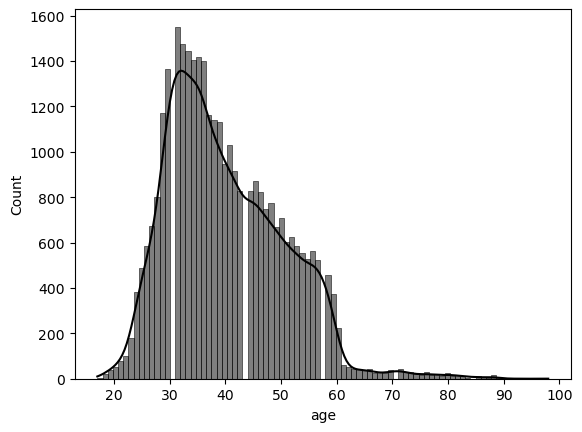

31    1551
32    1474
33    1443
35    1416
34    1404
      ... 
17       3
89       2
87       1
91       1
98       1
Name: age, Length: 75, dtype: int64

In [33]:
#Lets plot Age
sns.histplot(x='age',data=data,kde=True,color='black')
plt.show()
data['age'].value_counts()

Here , We can see that most of the people age lie on 30 to 40 anf its look like right skewed but we dont consider as a skewed because . i my assumtion people can have the age of 90+

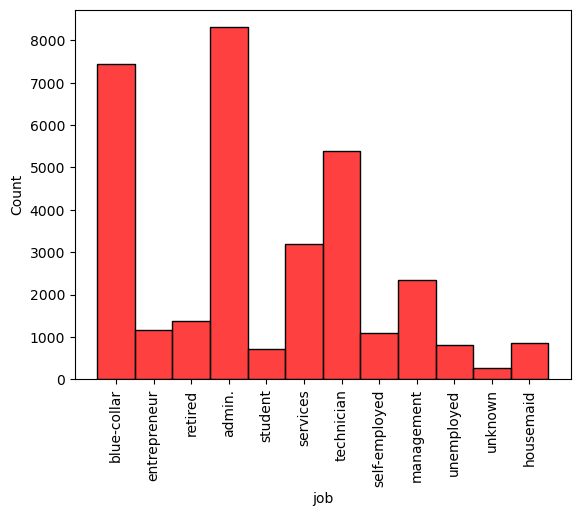

admin.           8312
blue-collar      7440
technician       5398
services         3195
management       2345
retired          1364
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

In [32]:
#Lets plot job
sns.histplot(x='job',data=data,color='r')
plt.xticks(rotation=90)
plt.show()
data['job'].value_counts()

Here , We can see that most of the people jobs are admin then blue collar and then technician and least of the people is student and then housemaid ann then enterpreneur. and for the few people dont get info about job

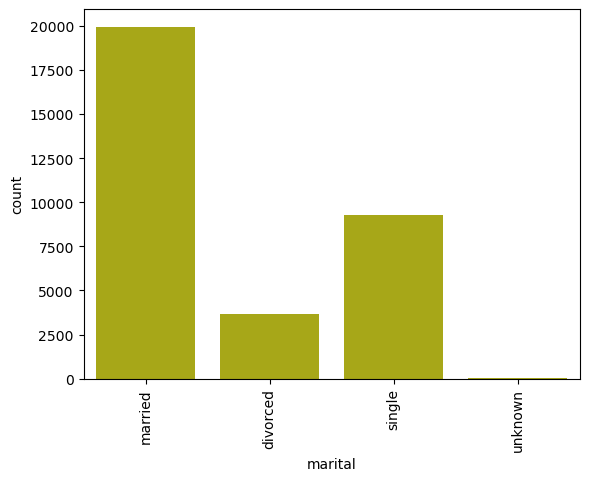

married     19947
single       9256
divorced     3674
unknown        65
Name: marital, dtype: int64

In [36]:
#Lets plot marital
sns.countplot(x='marital',data=data,color='y')
plt.xticks(rotation=90)
plt.show()
data['marital'].value_counts()

So, Here we can see that most of the peoples are married then single .. and least of the people are unknown and then divorced.

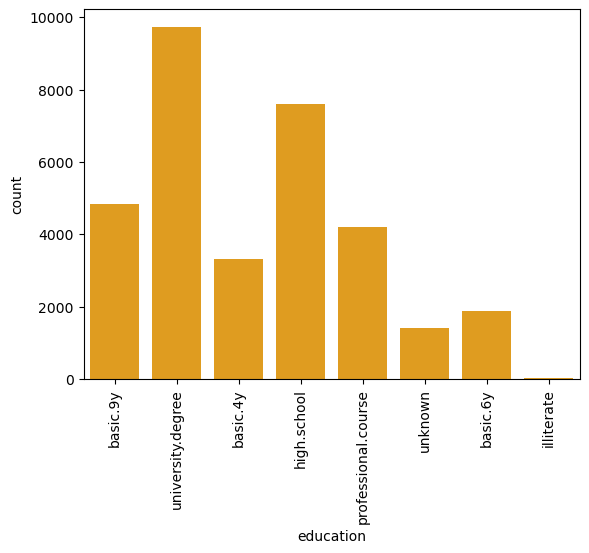

university.degree      9733
high.school            7594
basic.9y               4826
professional.course    4191
basic.4y               3322
basic.6y               1864
unknown                1396
illiterate               16
Name: education, dtype: int64

In [42]:
#Lets plot education
sns.countplot(x='education',data=data,color='orange')
plt.xticks(rotation=90)
plt.show()
data['education'].value_counts()

So, Here we can se that most have the prople have university degree . and then most of the people have high school and then basic.9y and then professional.course and follow by basic 4y , basic 6y ..

- 1396 people dont give the educational details to the banl

- Only 16 people are illiterate .

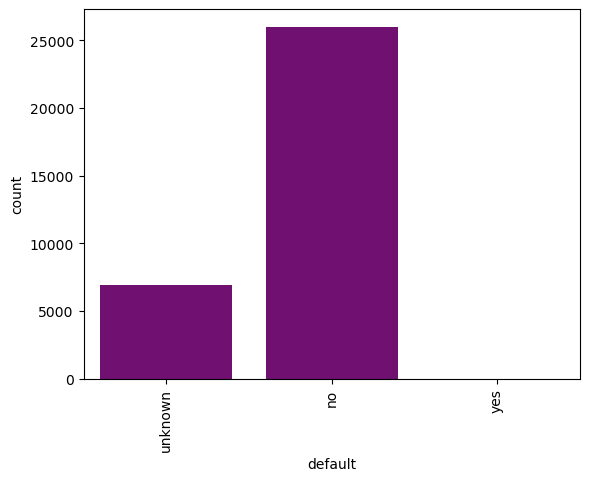

no         26000
unknown     6939
yes            3
Name: default, dtype: int64

In [46]:
#Lets plot default "has credit in default? ('no','yes','unknown')"
sns.countplot(x='default',data=data,color='purple')
plt.xticks(rotation=90)
plt.show()
data['default'].value_counts()

So, Here very least of the  people credit in and maximum people are not credit .. and we dont know for 6939 people he credit or not. 

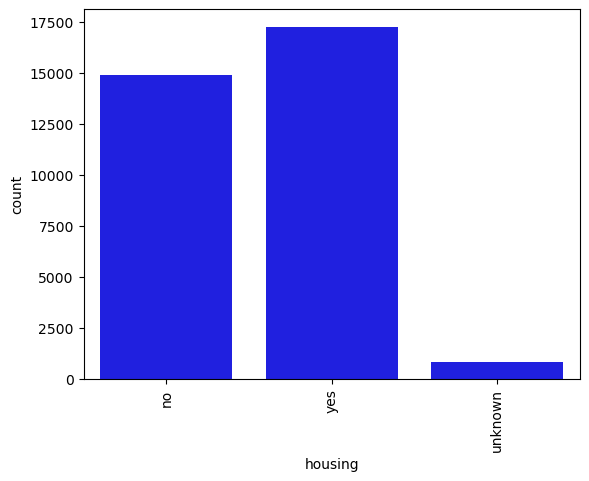

yes        17251
no         14895
unknown      796
Name: housing, dtype: int64

In [48]:
#Lets plot housing "has housing loan? ('no','yes','unknown')"
sns.countplot(x='housing',data=data,color='blue')
plt.xticks(rotation=90)
plt.show()
data['housing'].value_counts()

So, Most of the people have house loan and 14895 people dont have house load. and for 796 people we dont know he have or load or not.

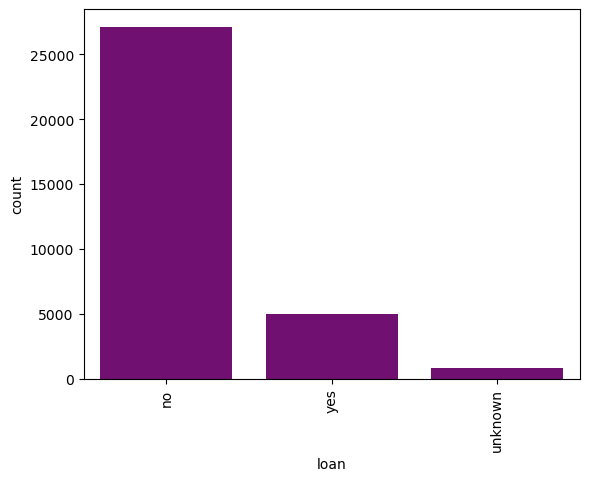

no         27123
yes         5023
unknown      796
Name: loan, dtype: int64

In [51]:
#Lets plot loan "has personal loan? ('no','yes','unknown')"
sns.countplot(x='loan',data=data,color='purple')
plt.xticks(rotation=90)
plt.show()
data['loan'].value_counts()

So, Most of the people dont have personal loan . and 5023 people have personal load and for 796 people we dont know he have a loan or not.

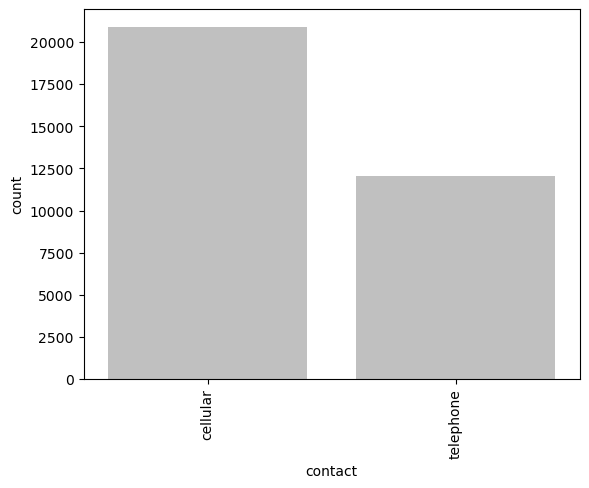

cellular     20903
telephone    12039
Name: contact, dtype: int64

In [53]:
#Lets plot Contact "contact communication type ('cellular','telephone')"
sns.countplot(x='contact',data=data,color='silver')
plt.xticks(rotation=90)
plt.show()
data['contact'].value_counts()

So, Here most of the people give cellular number to bank and least of the people give to the bank telephone number.

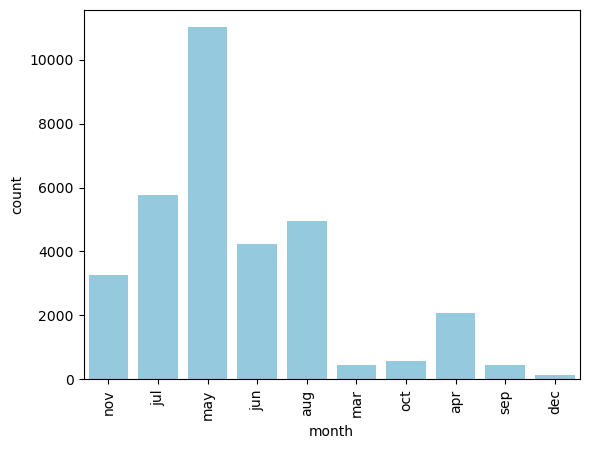

may    11009
jul     5761
aug     4946
jun     4247
nov     3265
apr     2085
oct      586
sep      464
mar      436
dec      143
Name: month, dtype: int64

In [56]:
#Lets plot month "last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
sns.countplot(x='month',data=data,color='skyblue')
plt.xticks(rotation=90)
plt.show()
data['month'].value_counts()

So, Here we can se that most of the call goes to the loan taker to the month of may followed by july, aug , jun , nov, apr, oct . and least call done in dec.

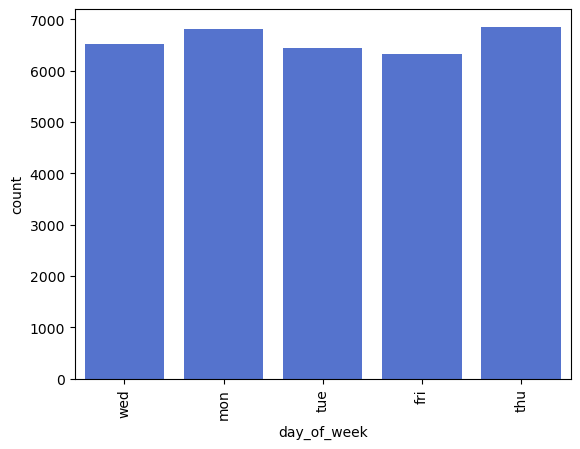

thu    6854
mon    6811
wed    6515
tue    6441
fri    6321
Name: day_of_week, dtype: int64

In [59]:
#Lets plot day_of_week "last contact day of the week ('mon','tue','wed','thu','fri')"
sns.countplot(x='day_of_week',data=data,color='royalblue')
plt.xticks(rotation=90)
plt.show()
data['day_of_week'].value_counts()

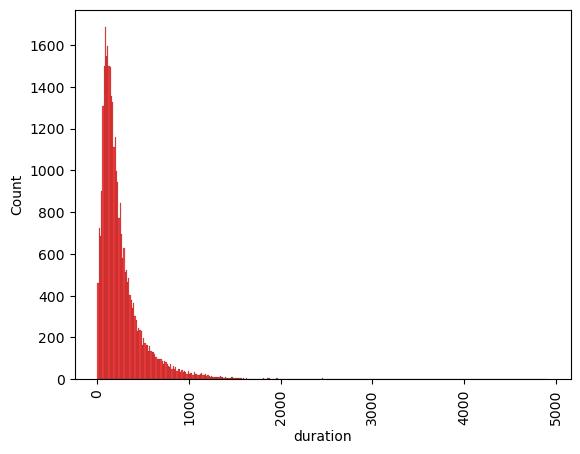

90      147
136     138
124     138
85      137
97      133
       ... 
1285      1
2203      1
1848      1
1248      1
1434      1
Name: duration, Length: 1467, dtype: int64

In [64]:
#Lets plot duration "last contact duration, in seconds "
sns.histplot(x='duration',data=data,color='red')
plt.xticks(rotation=90)
plt.show()
data['duration'].value_counts()

So, Here we can see that most of the call between 1000 seconds. and are 5000 seconds . and look like a right skewed . Lets see in future .

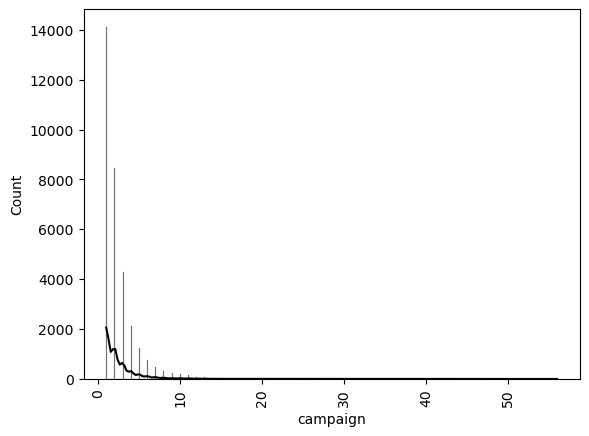

1     14116
2      8468
3      4299
4      2115
5      1255
6       773
7       493
8       329
9       220
10      187
11      142
12       92
13       74
14       52
17       51
15       45
16       42
18       27
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
31        7
29        7
28        6
30        6
35        4
33        3
43        2
32        2
42        2
34        1
37        1
40        1
56        1
Name: campaign, dtype: int64

In [67]:
#Lets plot campaign "number of contacts performed during this campaign and for this client (includes last contact "
sns.histplot(x='campaign',data=data,color='black',kde=True)
plt.xticks(rotation=90)
plt.show()
data['campaign'].value_counts()

So, Here we can see that most of contacs formed betwee 1 to 10 . and its also look like a right skewed.

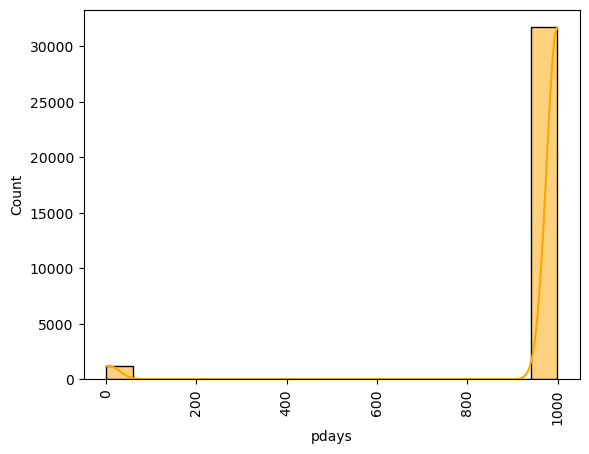

999    31716
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: pdays, dtype: int64

In [70]:
#Lets plot pdays "number of days that passed by after the client was last contacted from a previous campaign "
#(999 means client was not previously contacted) 
sns.histplot(x='pdays',data=data,color='orange',kde=True)
plt.xticks(rotation=90)
plt.show()
data['pdays'].value_counts()

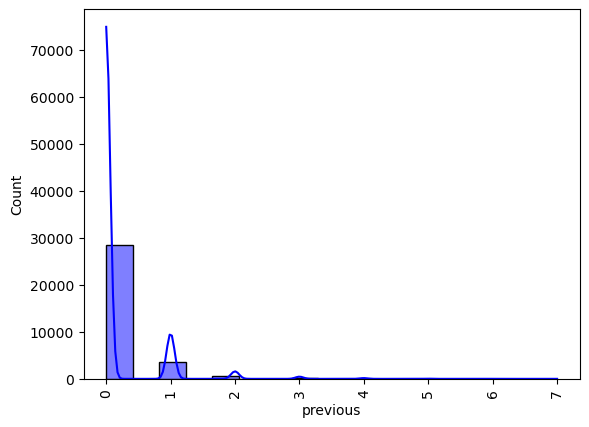

0    28408
1     3673
2      606
3      175
4       60
5       14
6        5
7        1
Name: previous, dtype: int64

In [73]:
#Lets plot previous "number of contacts performed before this campaign and for this client "
sns.histplot(x='previous',data=data,color='blue',kde=True)
plt.xticks(rotation=90)
plt.show()
data['previous'].value_counts()

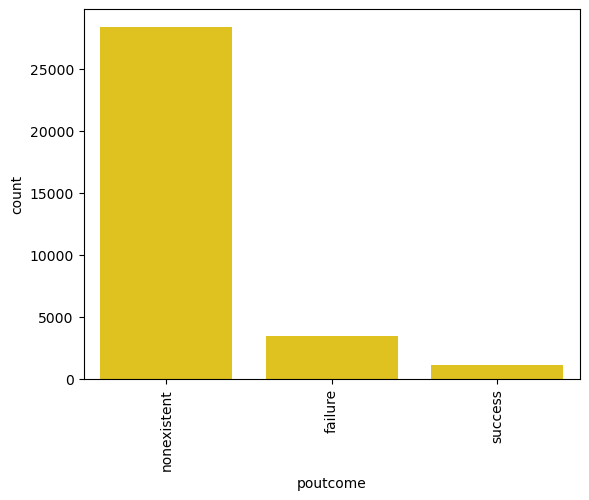

nonexistent    28408
failure         3429
success         1105
Name: poutcome, dtype: int64

In [78]:
#Lets plot poutcome "outcome of the previous marketing campaign ('failure','nonexistent','success')"
sns.countplot(x='poutcome',data=data,color='gold')
plt.xticks(rotation=90)
plt.show()
data['poutcome'].value_counts()

So, Here we can see that in previous marketing most of people add from nonexistent and then failure and then sucess

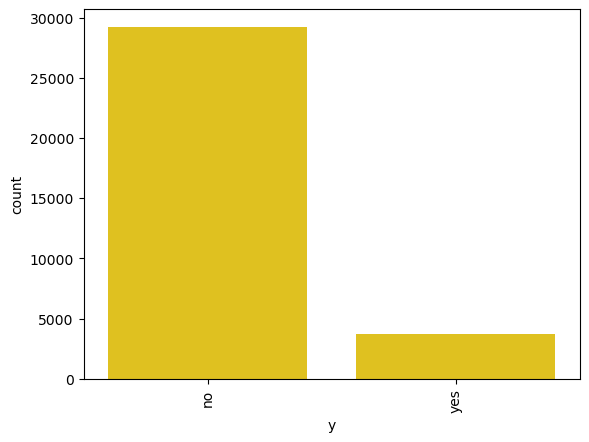

no     29230
yes     3712
Name: y, dtype: int64

In [80]:
#Lets plot y "has the client subscribed a term deposit? ('yes','no'"
sns.countplot(x='y',data=data,color='gold')
plt.xticks(rotation=90)
plt.show()
data['y'].value_counts()

Here we can see that its a imbalanced dataset . So we have to treat this but nor right now.

# Bivariate Analysis

In [79]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [87]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


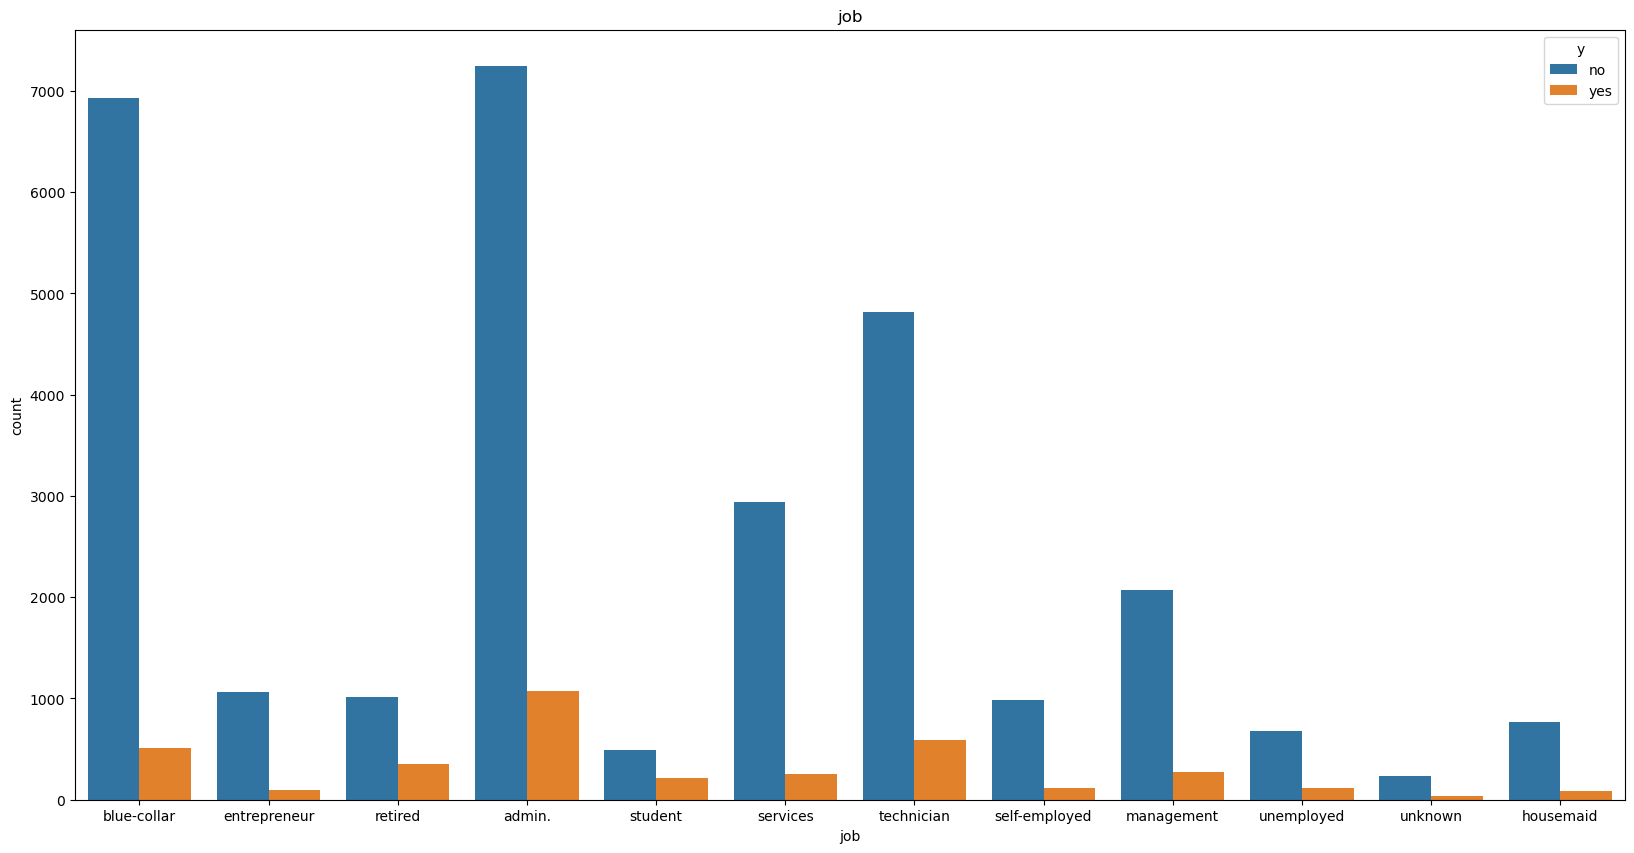

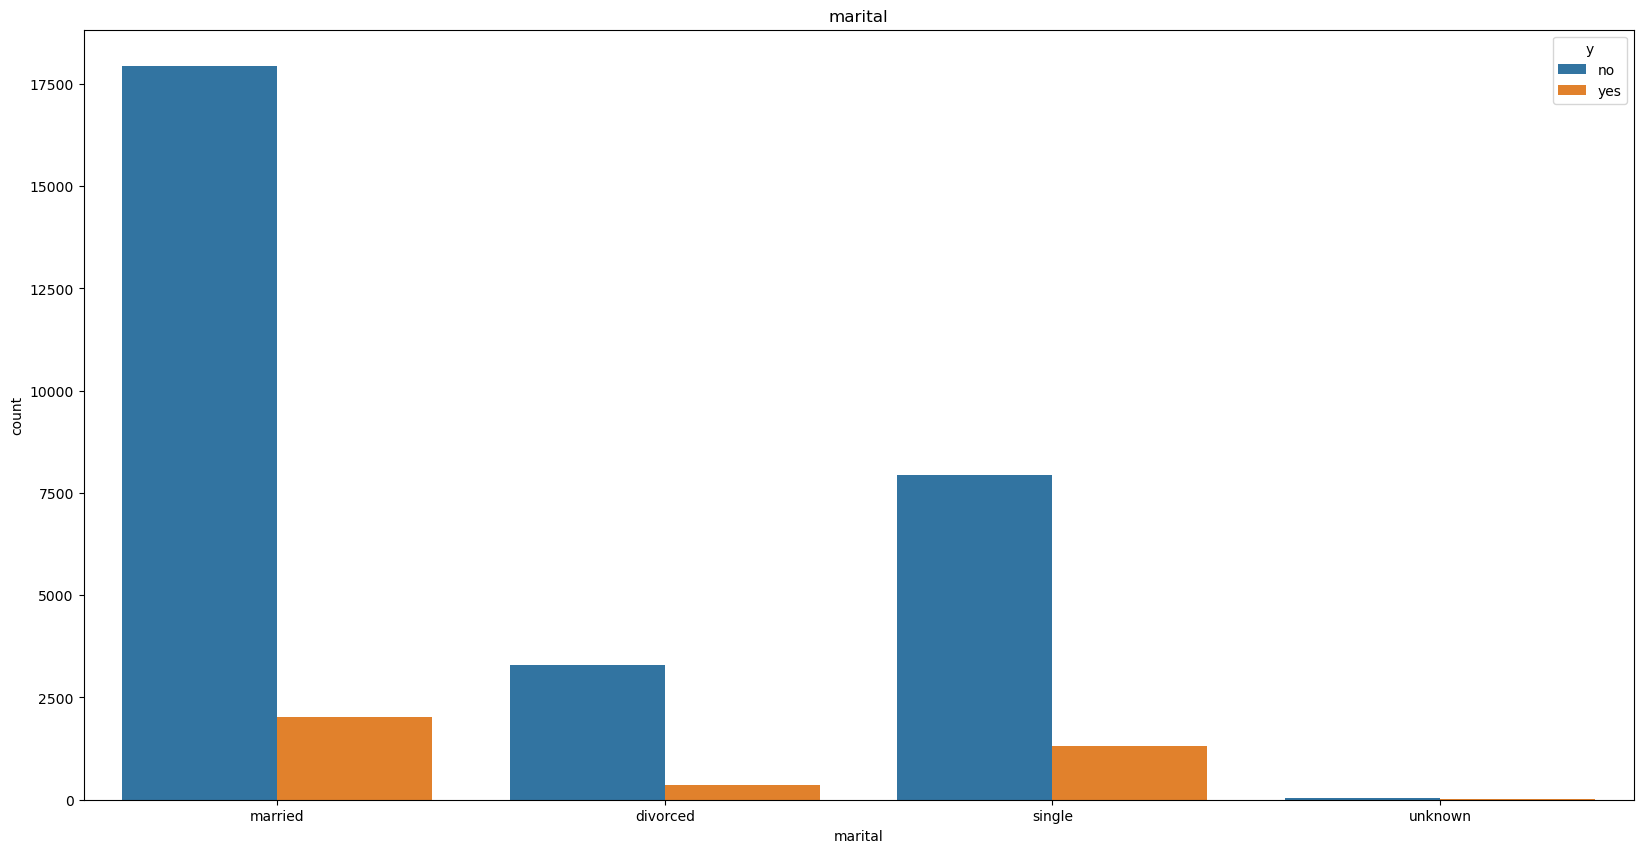

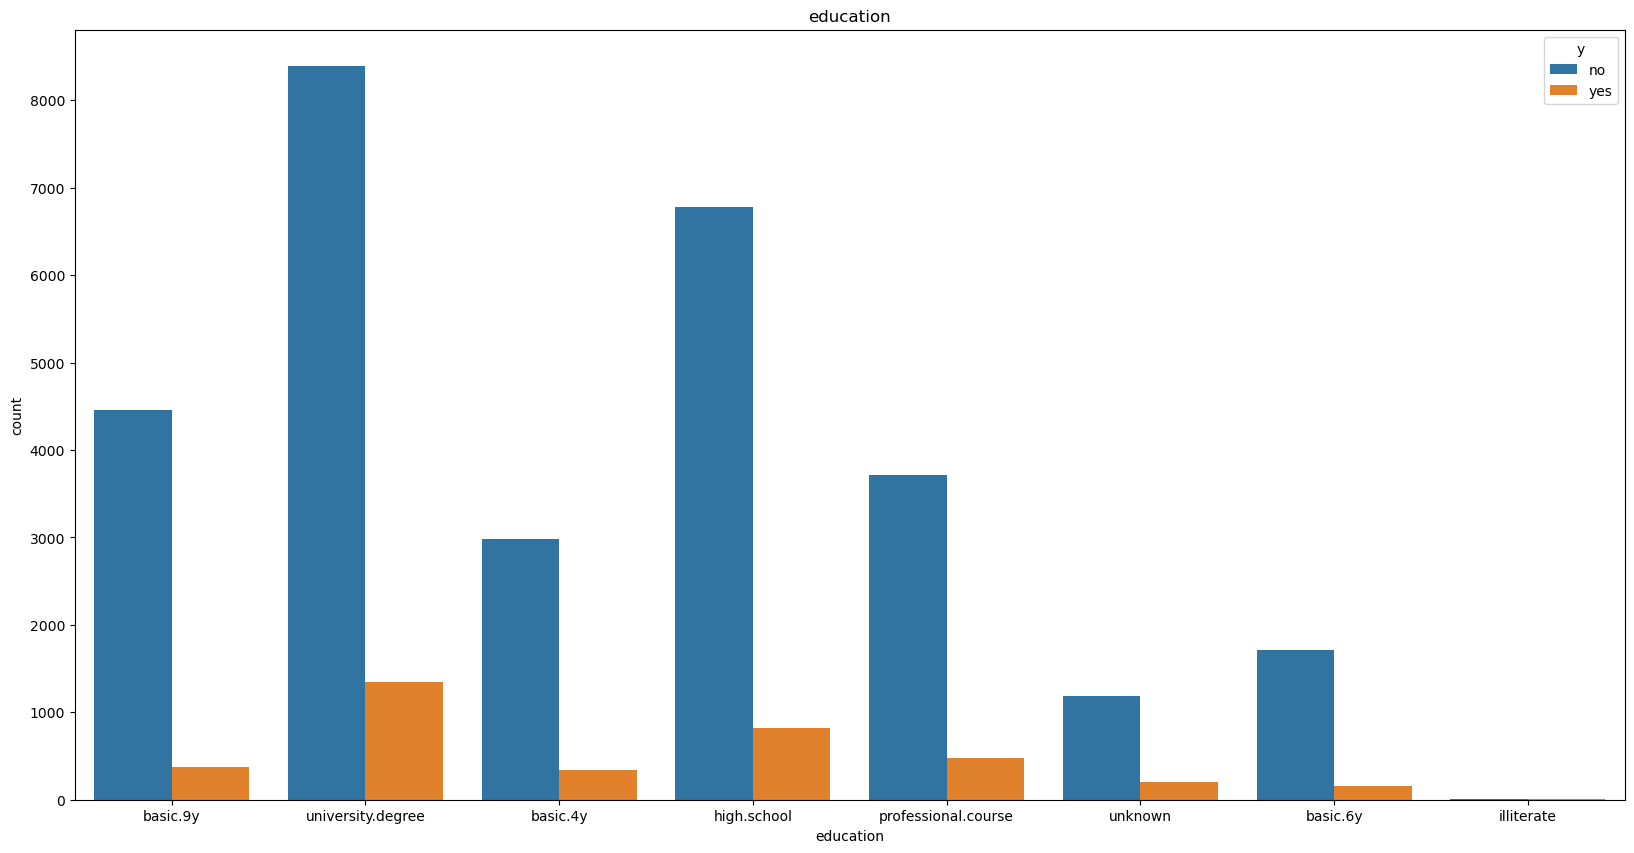

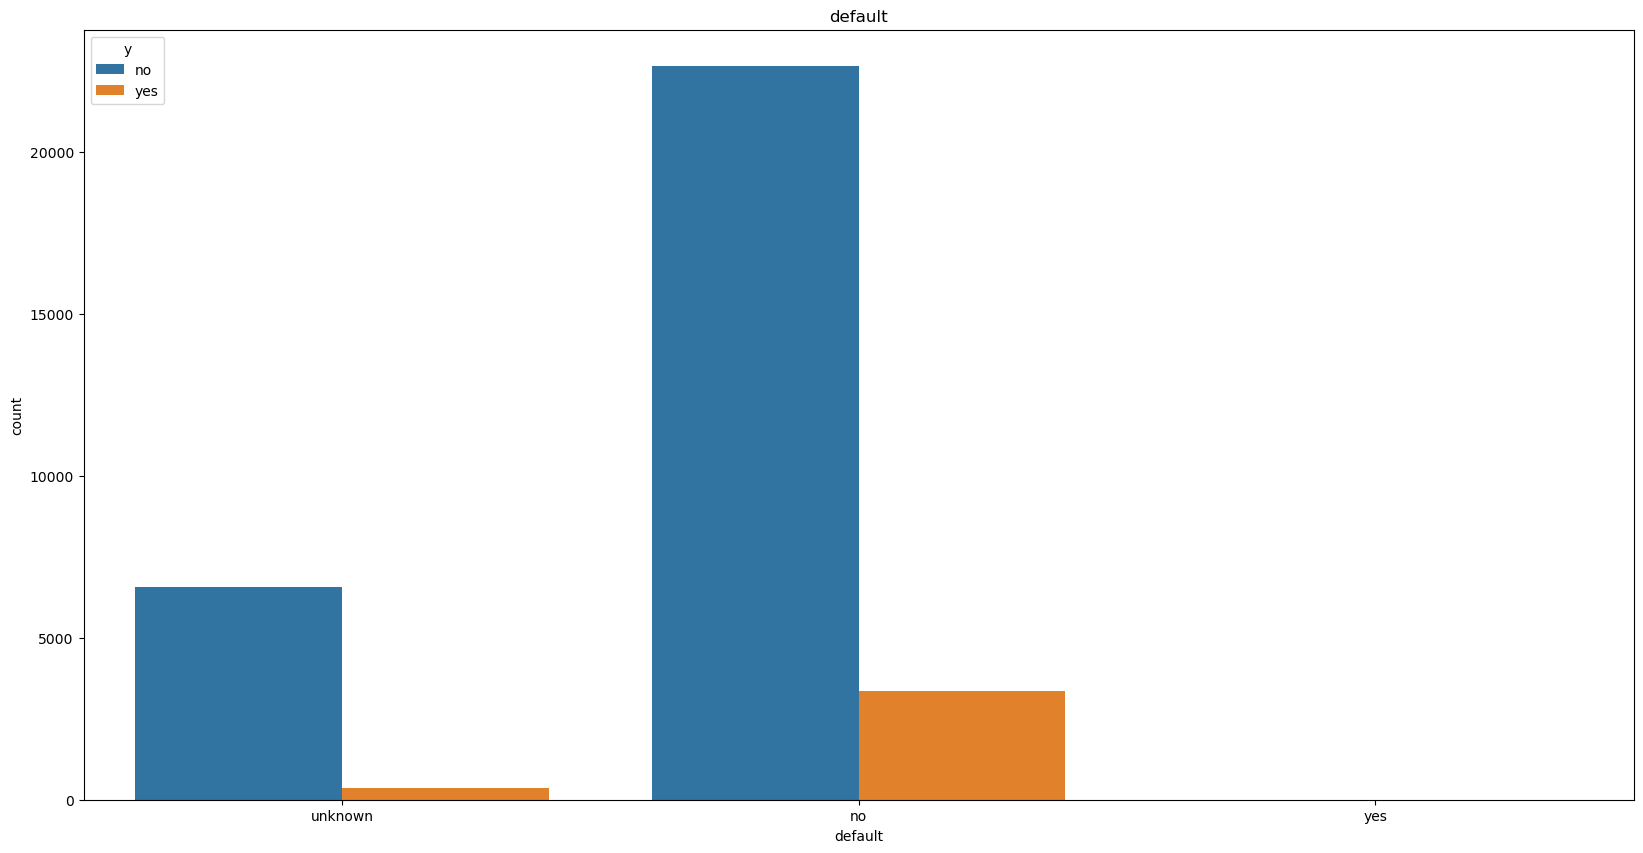

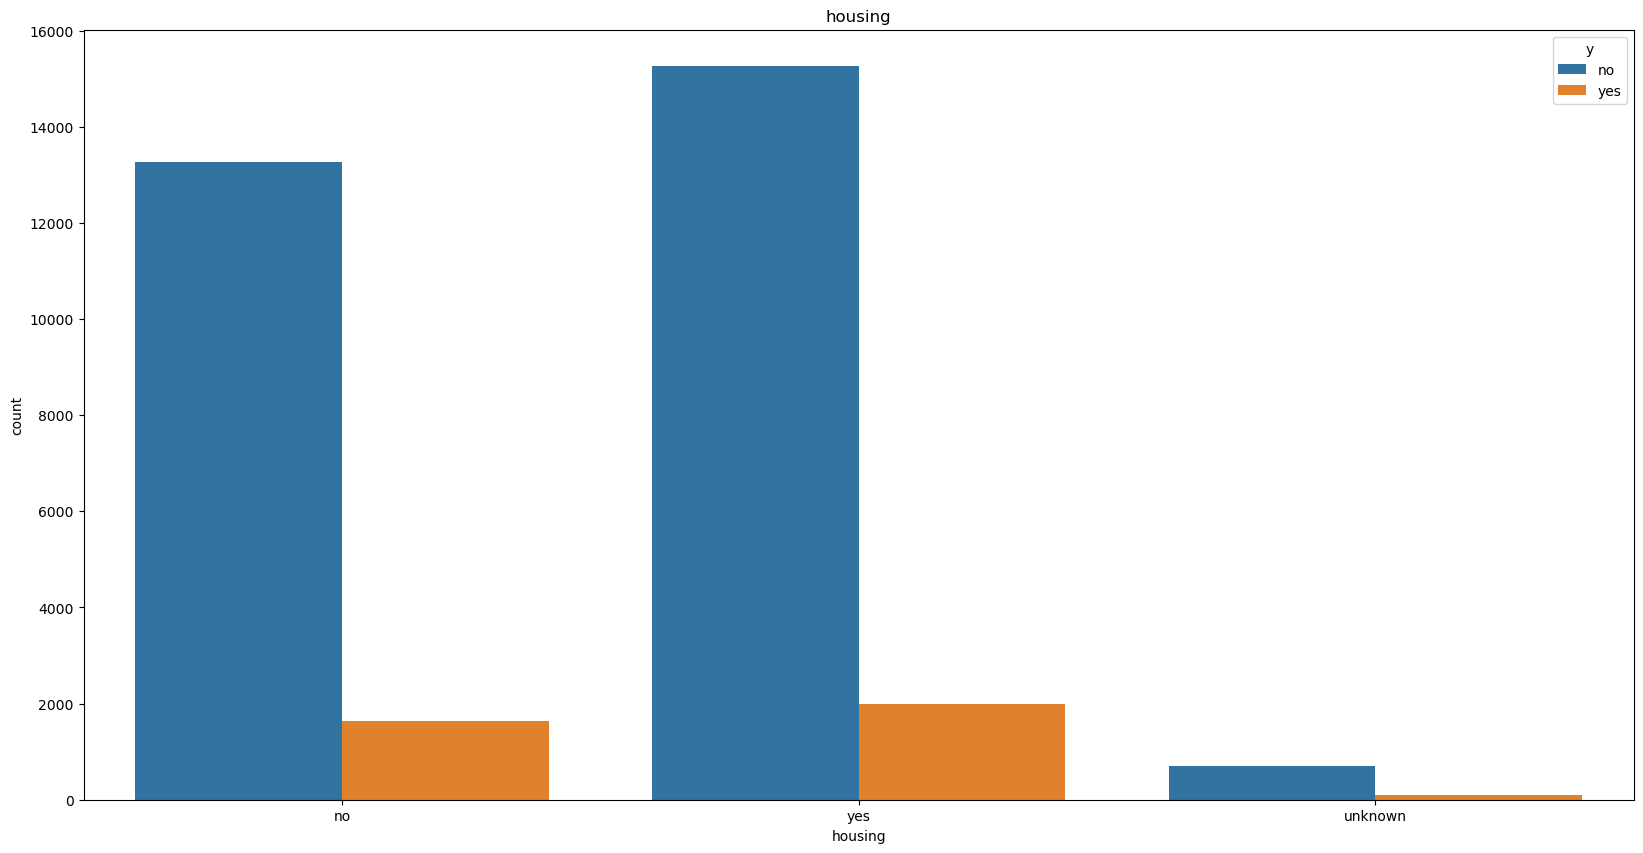

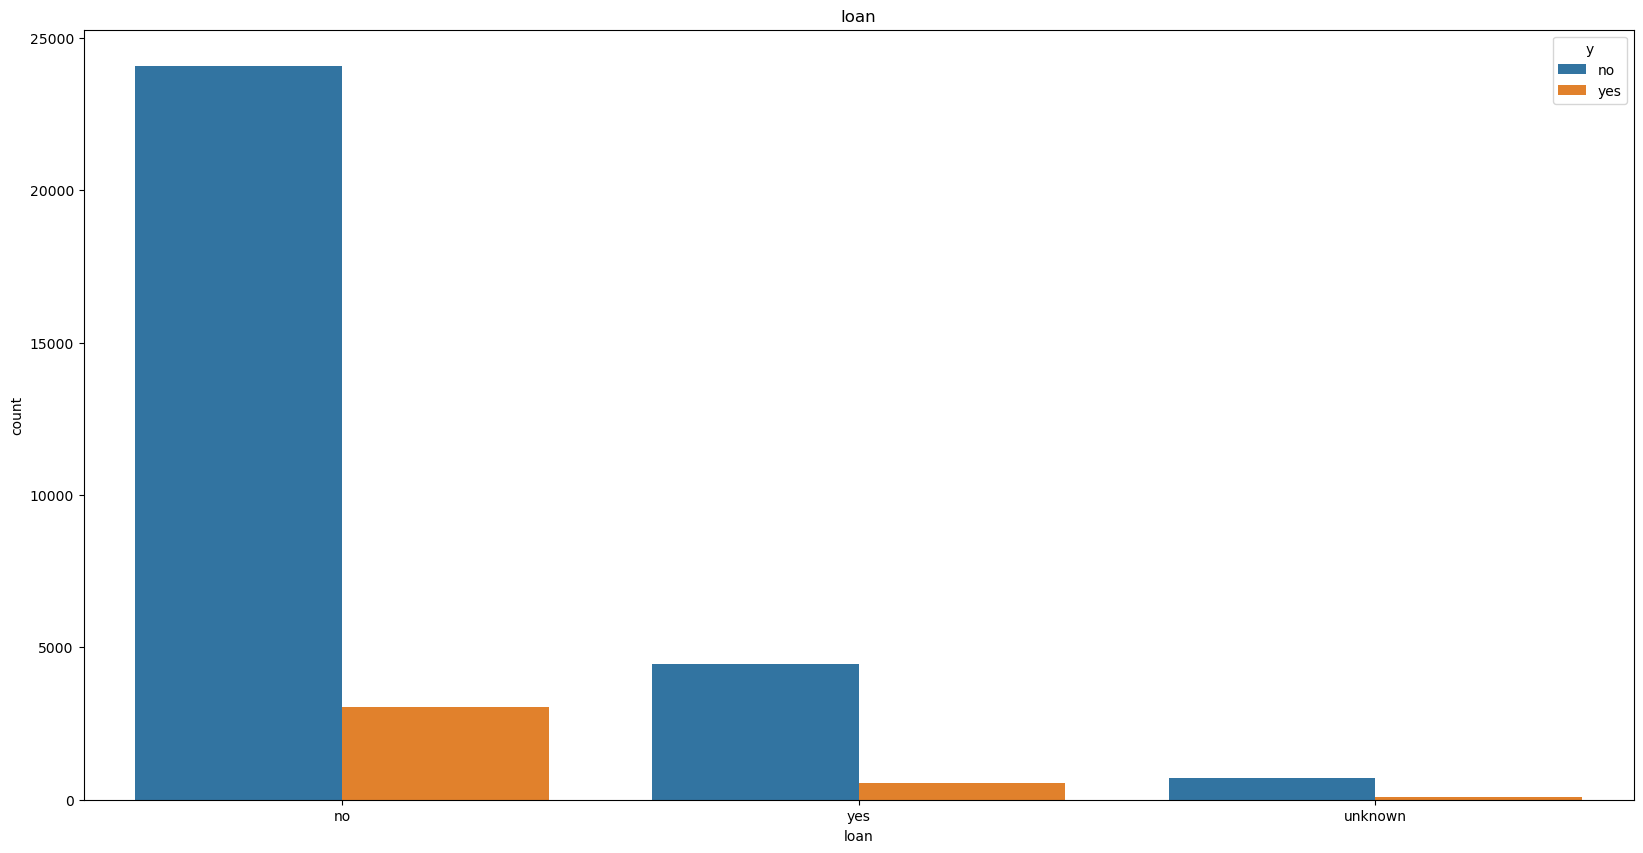

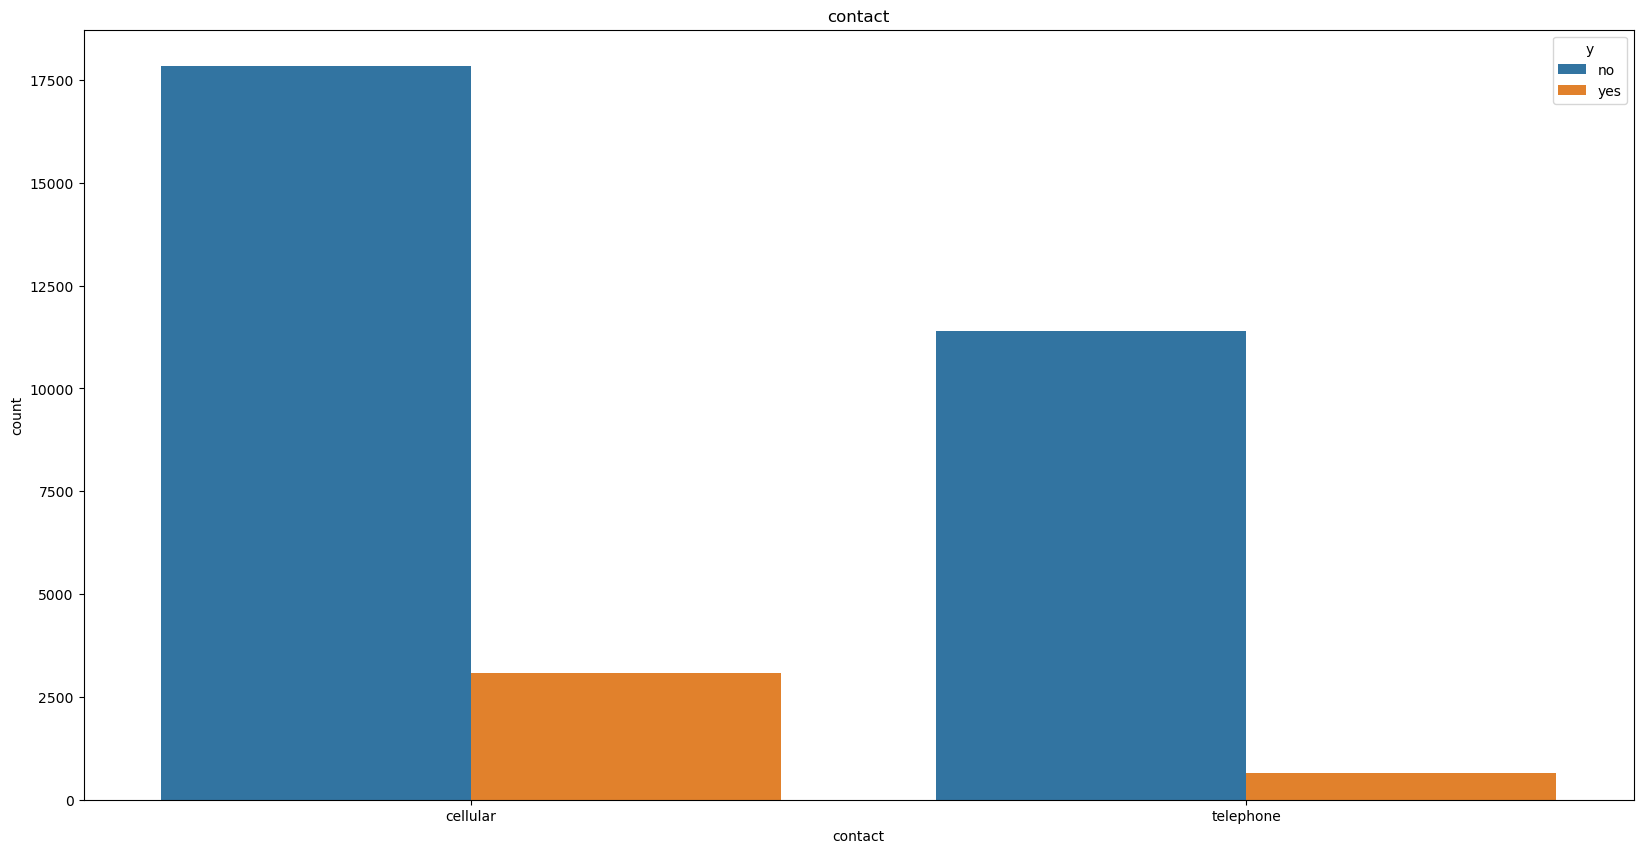

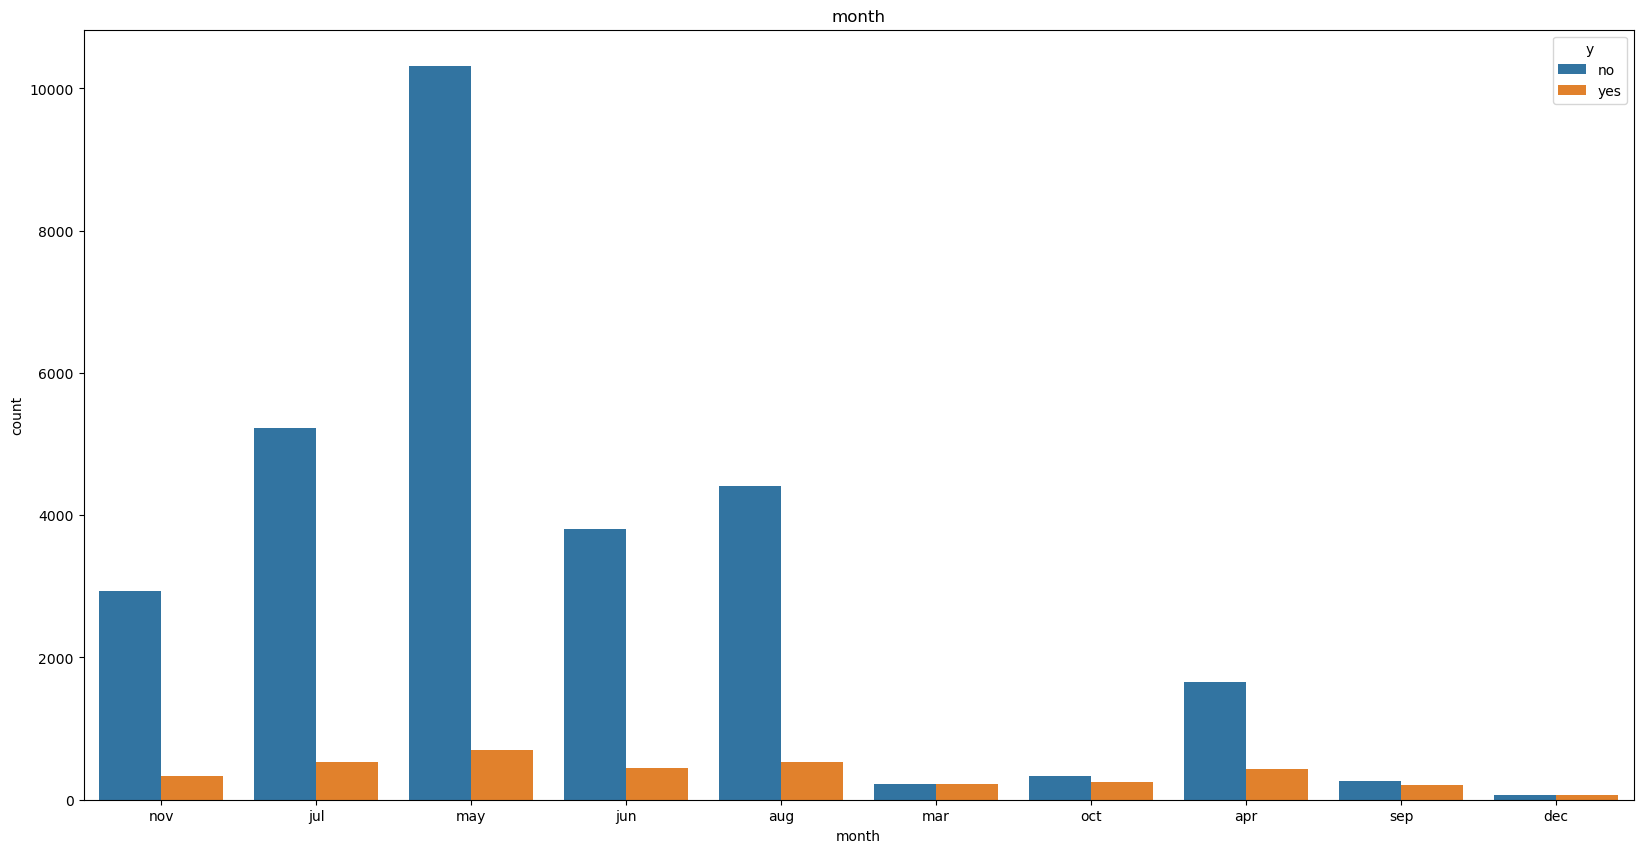

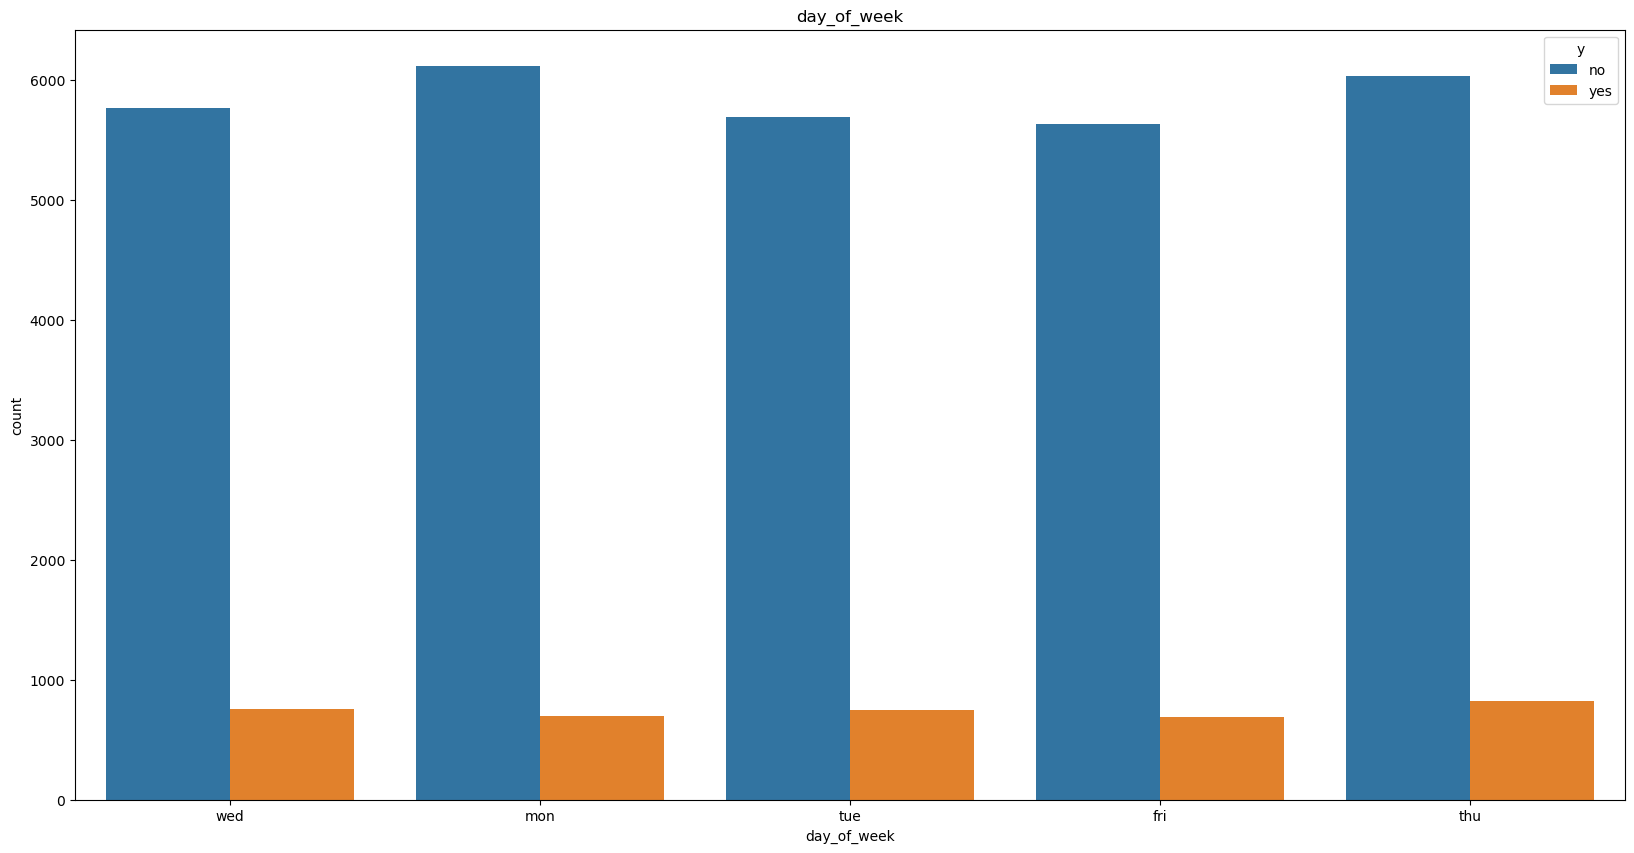

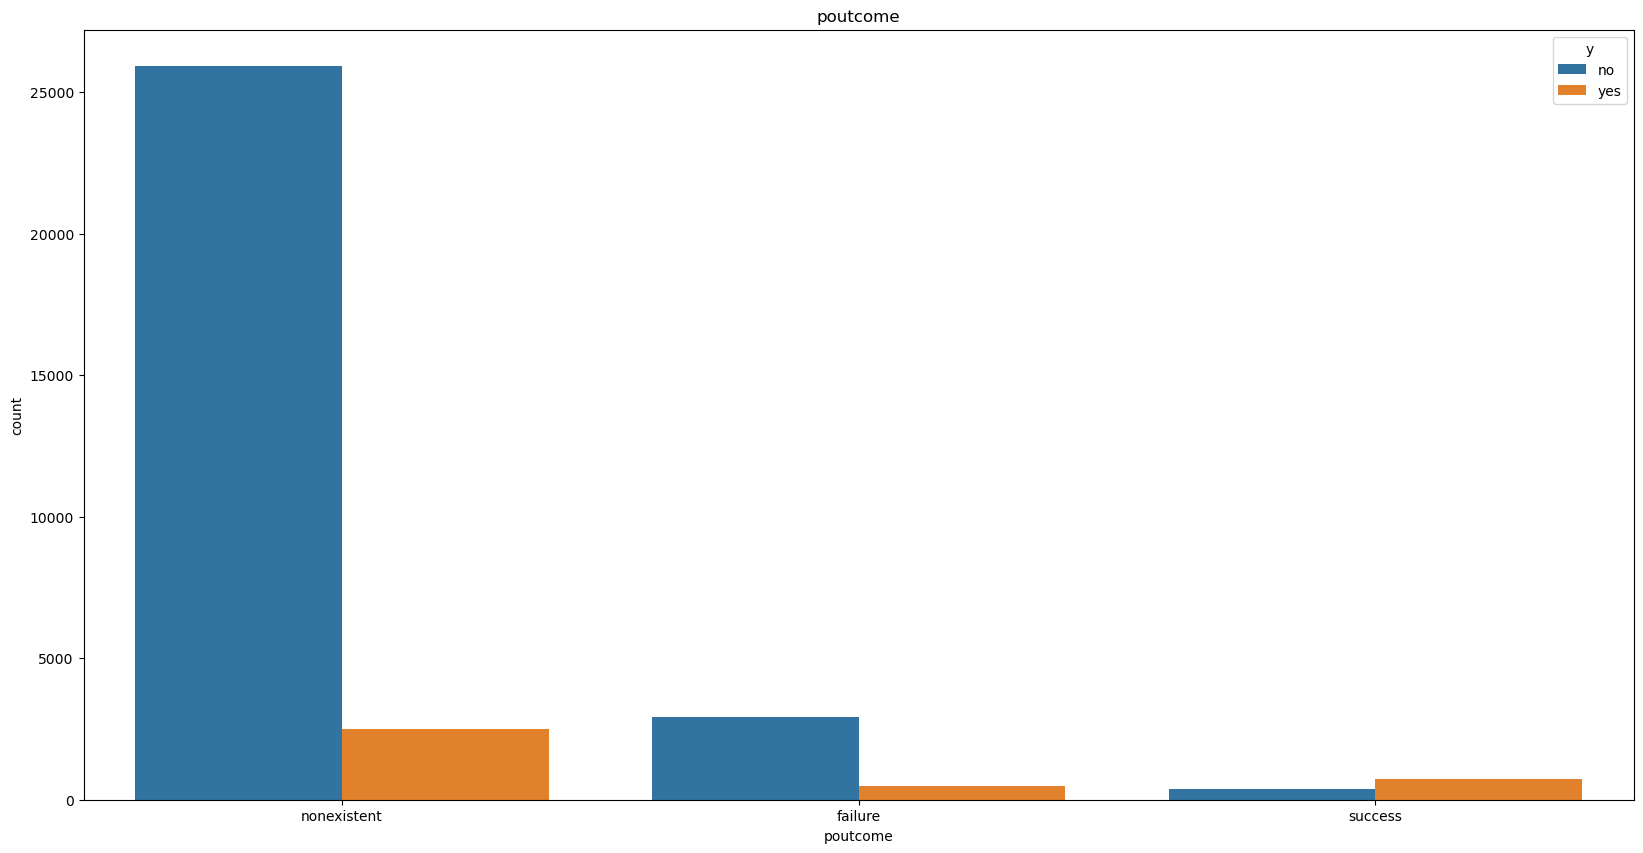

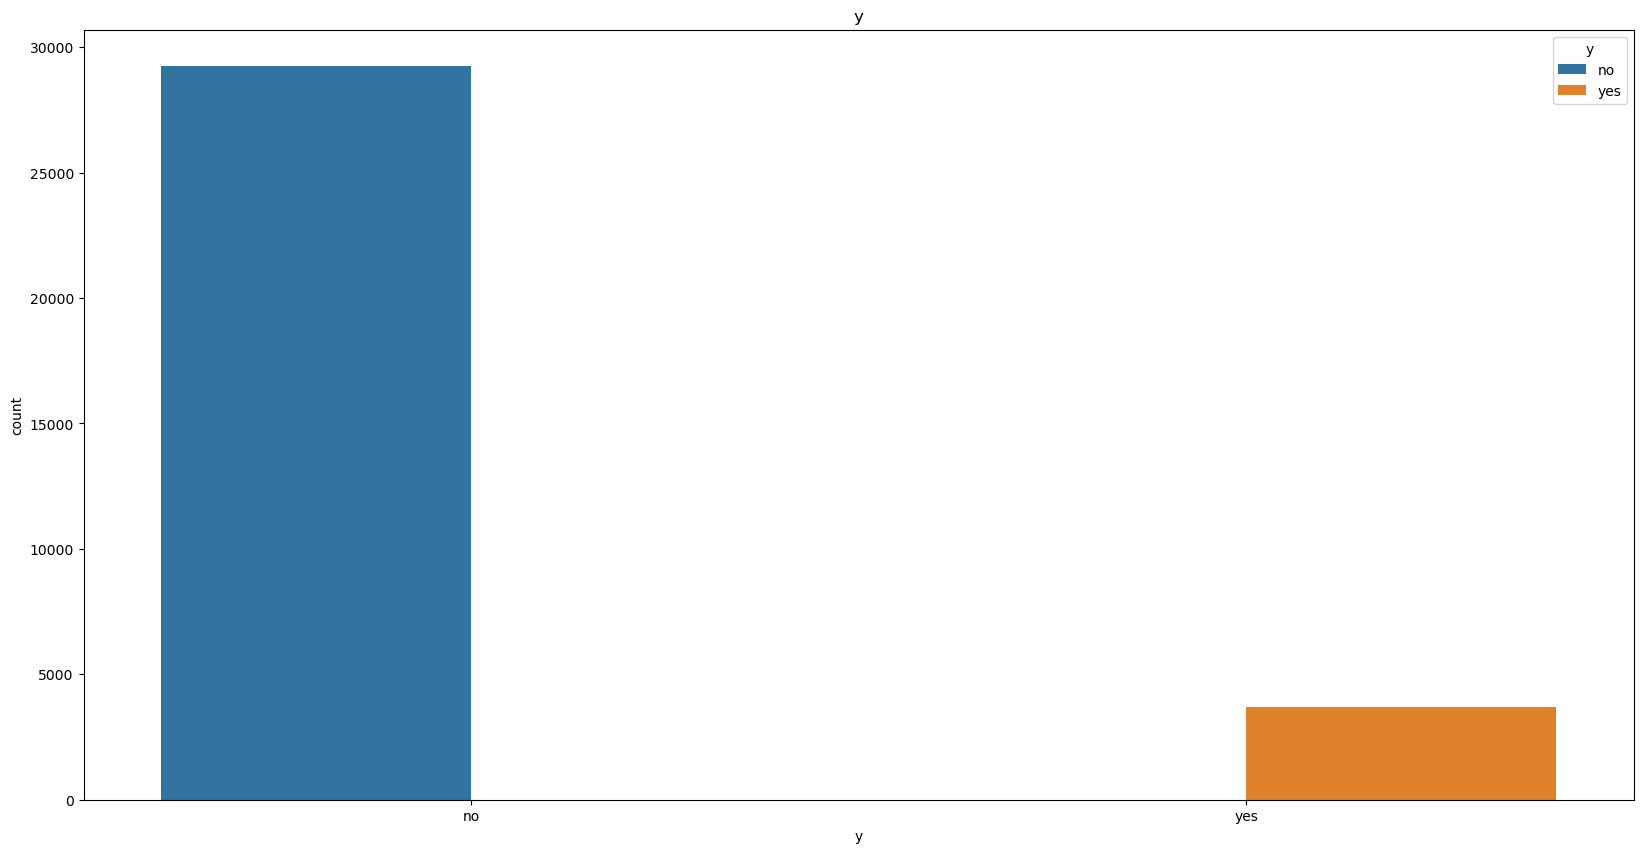

In [88]:
for i in categorical_col:
    plt.figure(figsize=(20,10))
    sns.countplot(x=i, data=data[categorical_col], hue="y")
    plt.title(i)

# Multivariate Analysis

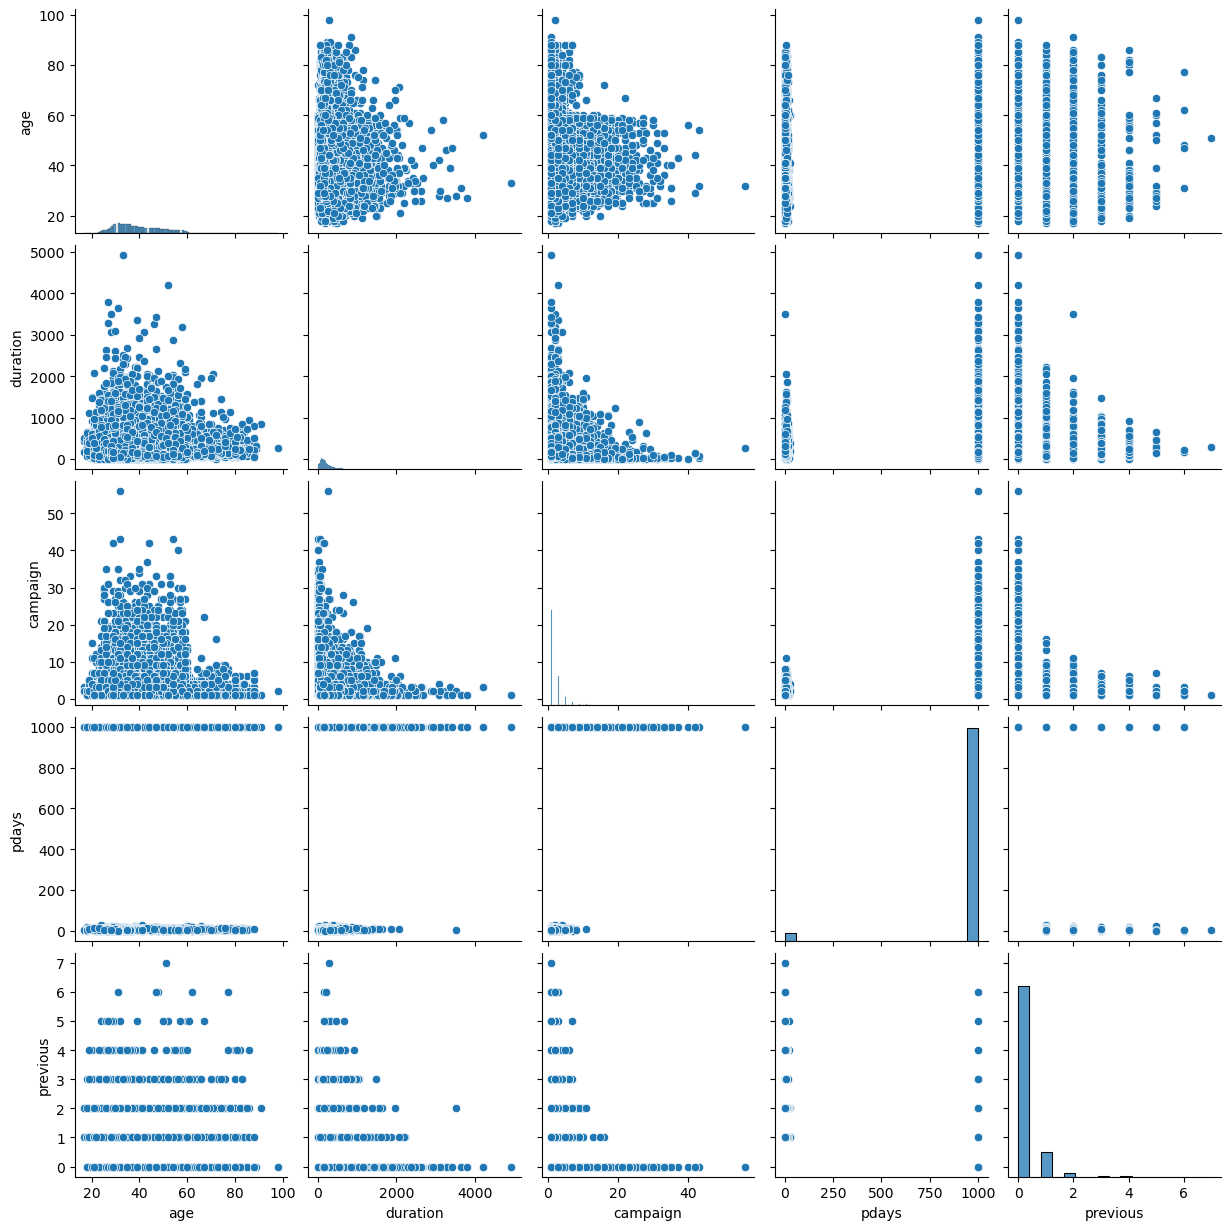

In [97]:
sns.pairplot(data)
plt.show()

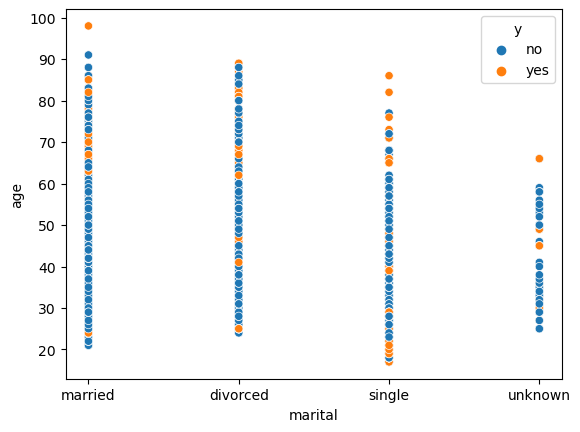

In [102]:
# Lets see the relation between other variables with the target variable
sns.scatterplot(y='age',x='marital',hue='y',data=data)
plt.show()

So , Here we can see that married people are more chances to deposit and unknows people have least chance

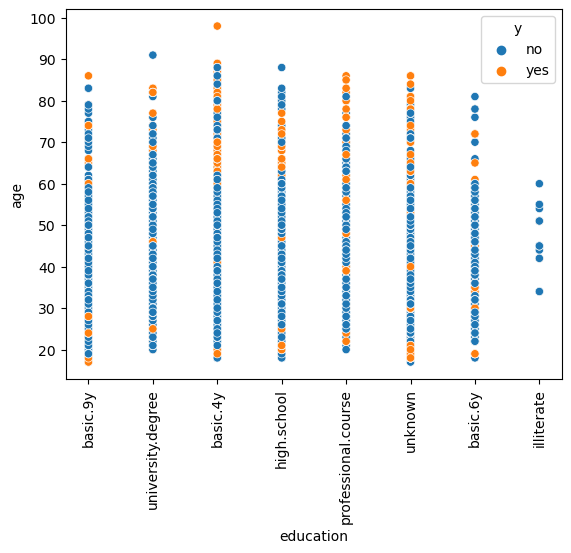

In [105]:
# Lets see the relation between other variables with the target variable
sns.scatterplot(y='age',x='education',hue='y',data=data)
plt.xticks(rotation=90)
plt.show()

Here , We can see that illiterate people dont subcribe the chance of deposite.  and very less people has subscribe

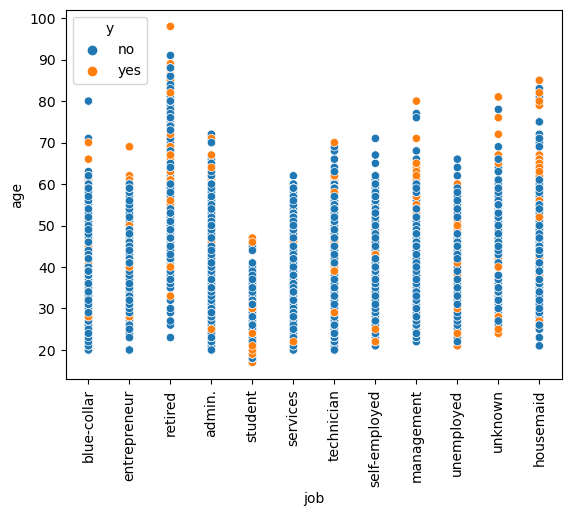

In [108]:
# Lets see the relation between other variables with the target variable
sns.scatterplot(y='age',x='job',hue='y',data=data)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that subscriber from all the job group are same . but only blue collar and enterpreneur and self service and services have less subscriber

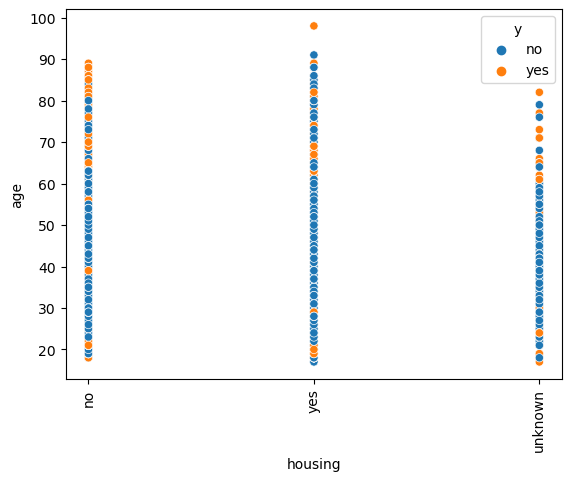

In [110]:
# Lets see the relation between other variables with the target variable
sns.scatterplot(y='age',x='housing',hue='y',data=data)
plt.xticks(rotation=90)
plt.show()

So, here we can see that who dont have house loan that people are most subscribe for long term and who have house loan those people are not prefer fom long term subscription.. and also unknown people have

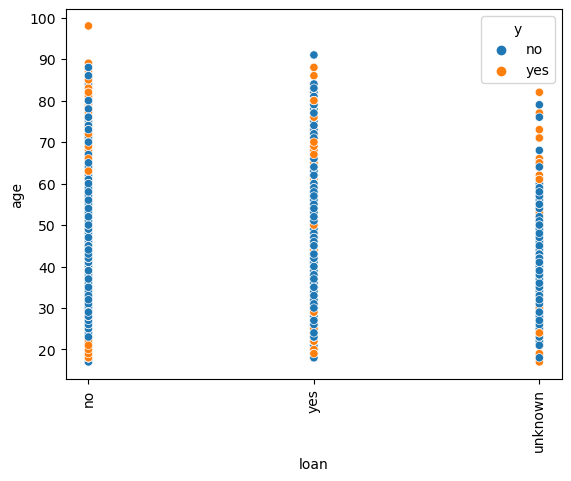

In [112]:
# Lets see the relation between other variables with the target variable
sns.scatterplot(y='age',x='loan',hue='y',data=data)
plt.xticks(rotation=90)
plt.show()

So, here we can see that . who dont have personal loan and who have personal . they all are same in amount those people are investing in long term subscription

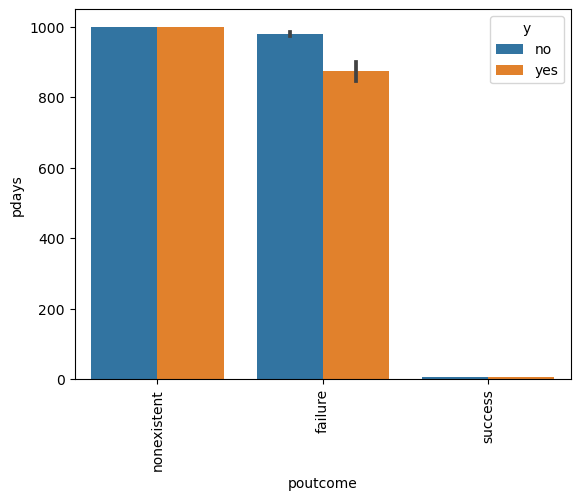

In [120]:
# Lets see the relation between other variables with the target variable
sns.barplot(y='pdays',x='poutcome',hue='y',data=data)
plt.xticks(rotation=90)
plt.show()

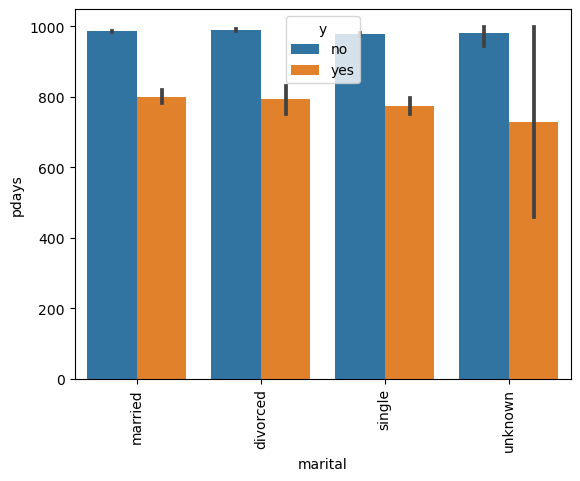

In [122]:
# Lets see the relation between other variables with the target variable
sns.barplot(x='marital',y='pdays',hue='y',data=data)
plt.xticks(rotation=90)
plt.show()

In [123]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

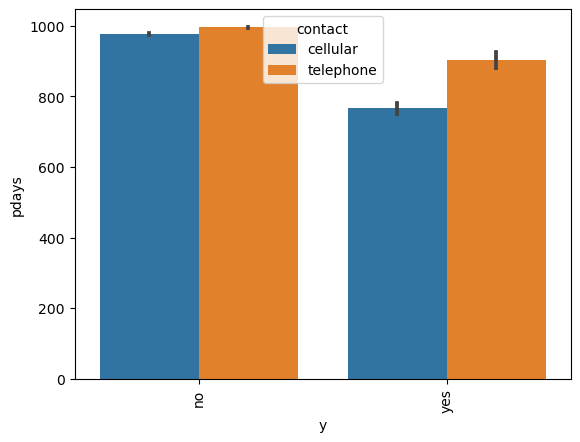

In [124]:
# Lets see the relation between other variables with the target variable
sns.barplot(x='y',y='pdays',hue='contact',data=data)
plt.xticks(rotation=90)
plt.show()

In [125]:
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0
...,...,...,...,...,...
32945,28,192,1,999,0
32946,52,64,1,999,1
32947,54,131,4,999,0
32948,29,165,1,999,0


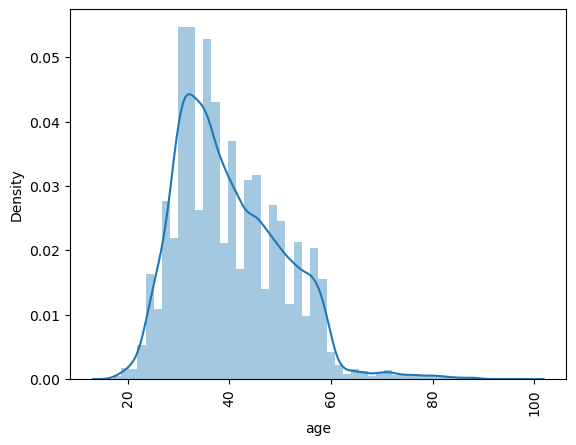

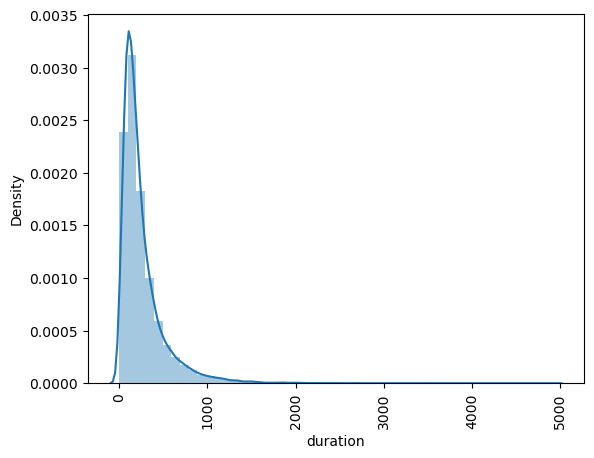

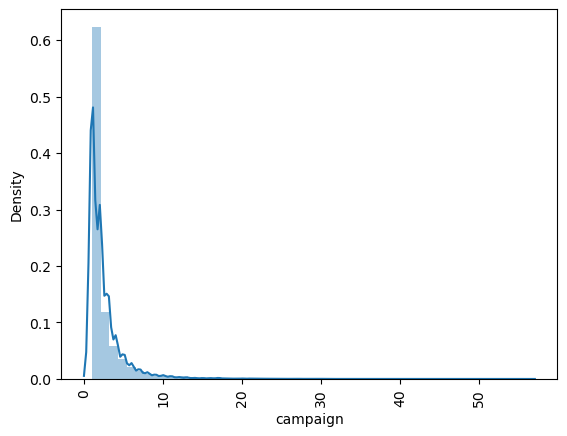

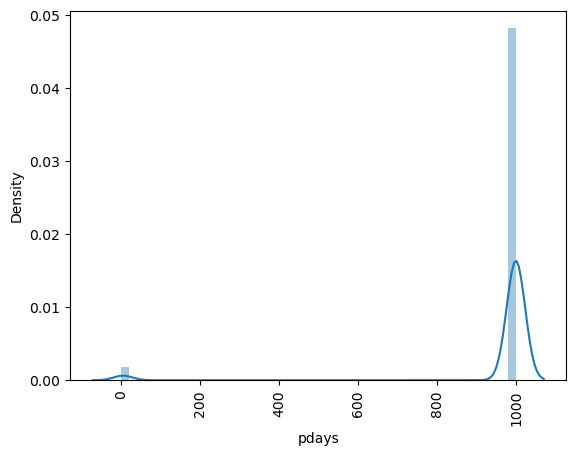

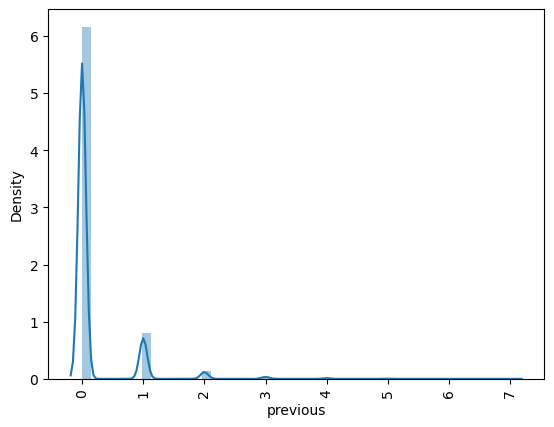

In [132]:
#Lets plot Boxplot
for i in newdf:
    plt.figure()
    sns.distplot(newdf[i])
    
    plt.xticks(rotation=90)
    plt.show()

So Here ,

- Duration have right skewed data
- Age is right Skewed but i an not going to consider as a 90+ people alive.
- Campaing have right skewed data . but lets see in the future.

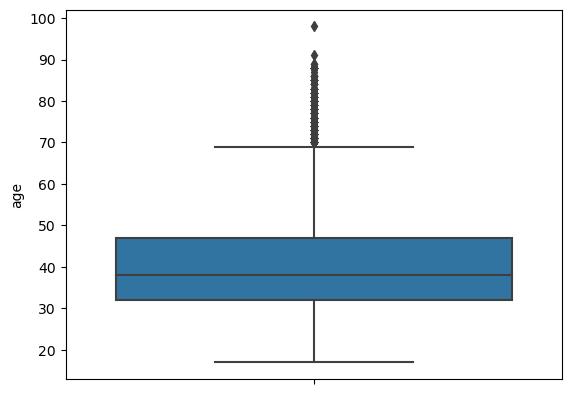

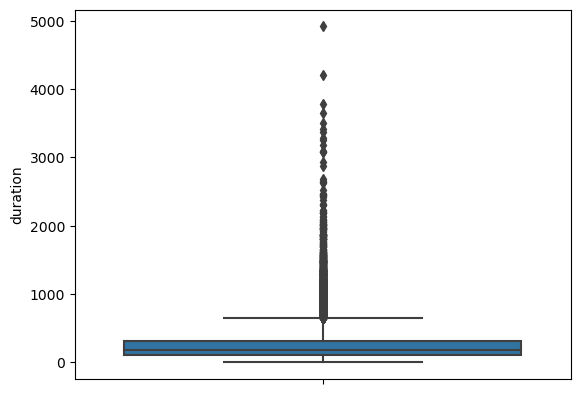

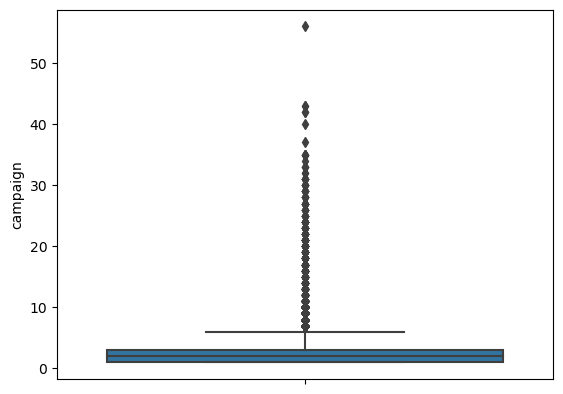

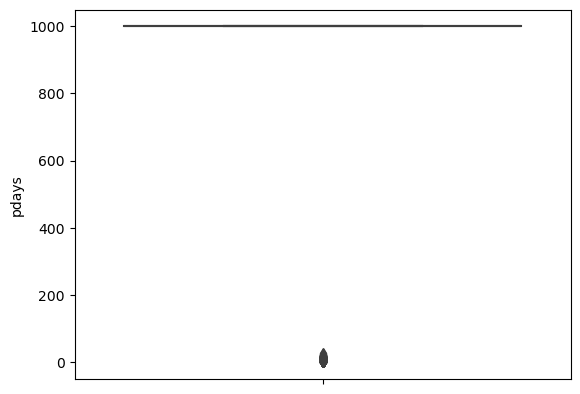

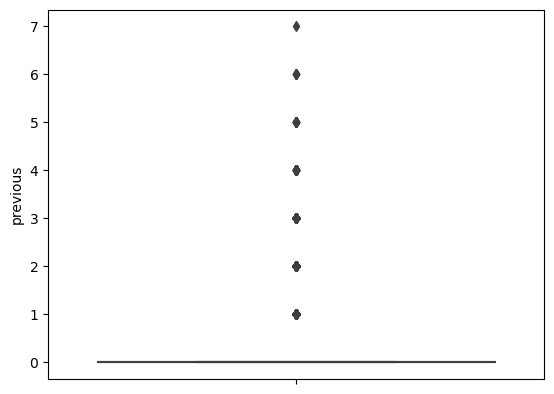

In [149]:
#Lets plot Boxplot
for i in newdf:
    plt.figure()
    sns.boxplot(y=newdf[i])
    
    plt.xticks(rotation=90)
    plt.show()

So, Here we can see that age , duration, campaign have outliers. 

Here we completed all visualtion part . left part is to plot the relational plot but . after encoding the target variable i am plotting. so for now we completed the visualization part lets move to preprocessing step.

# Data Preprocessing

In [134]:
#Lets Check for Outliers
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0
...,...,...,...,...,...
32945,28,192,1,999,0
32946,52,64,1,999,1
32947,54,131,4,999,0
32948,29,165,1,999,0


# Lets Remove Outliers

In [135]:
import numpy as np
from scipy.stats import zscore

In [136]:
features = data[['age','duration','campaign']]

In [137]:
# Using zscore to remove outliers

z=np.abs(zscore(features))

z

,age,duration,campaign
0,0.863914,0.120311,0.522862
1,0.289613,0.216840,0.203741
2,3.651604,3.435792,0.567042
3,0.385740,0.533453,0.203741
4,1.825186,0.424108,0.203741
...,...,...,...
32945,1.154758,0.255451,0.567042
32946,1.152296,0.749676,0.567042
32947,1.344550,0.490980,0.522862
32948,1.058631,0.359702,0.567042


In [138]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [139]:
# Shape of original dataset
data.shape

(32942, 16)

In [140]:
#After Removing Outliers
new_df.shape


(31310, 16)

In [141]:
# Checking the the data loss
data_loss = (32942-31310)/32942*100
data_loss

4.954161860239208

Here we loss 4.822 % Data

# ii) IQR (Inter Quantile Range) method

In [142]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [143]:
df1.shape

(28439, 16)

In [144]:
# Checking the the data loss
data_loss = (32942-28439)/32942*100
data_loss

13.66947969157914

So, in IQR Method we can see that we lost out 13.66 % data . lets move foreward with Z score if we dont get better result with Z Score Method then we choose IQR Method.

# Encoding the categorical columns using Label Encoding

In [145]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [146]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [147]:
new_df[categorical_col]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,1,1,2,1,0,0,0,7,4,1,0
1,2,1,6,0,0,0,1,7,4,0,0
3,0,1,6,0,2,0,1,6,1,1,0
4,5,0,6,0,0,0,0,4,3,1,0
5,0,2,6,0,0,0,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
32945,7,2,3,0,2,0,0,3,3,1,0
32946,9,1,5,0,2,0,0,7,0,0,0
32947,0,1,2,0,0,2,0,3,1,1,0
32948,0,1,6,0,0,0,1,6,0,1,0


In [148]:
new_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0
5,29,0,2,6,0,0,0,0,1,4,256,2,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,999,0,1,0
32946,52,9,1,5,0,2,0,0,7,0,64,1,999,1,0,0
32947,54,0,1,2,0,0,2,0,3,1,131,4,999,0,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1,0


# Correlation between the target variable and features using HEAT map

In [151]:
# Checking the correlation
cor = new_df.corr()
cor


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.014374,-0.391926,-0.101497,0.189259,-0.006356,-0.004652,0.028838,-0.032250,-0.022516,-0.000447,0.007350,-0.002345,-0.013957,0.018922,-0.009551
job,-0.014374,1.000000,0.035289,0.134662,-0.027215,0.005950,-0.012423,-0.022970,-0.028963,-0.000075,-0.006157,-0.003582,-0.031074,0.020706,0.013507,0.027008
marital,-0.391926,0.035289,1.000000,0.106218,-0.085397,0.019914,0.006131,-0.059076,-0.003426,0.003585,0.006994,-0.007188,-0.050541,0.049878,0.003958,0.061090
education,-0.101497,0.134662,0.106218,1.000000,-0.193054,0.023369,0.005033,-0.107223,-0.085619,-0.018466,-0.016386,-0.001749,-0.056274,0.048046,0.017994,0.073840
default,0.189259,-0.027215,-0.085397,-0.193054,1.000000,-0.018769,-0.002582,0.134207,-0.021300,-0.012736,-0.011141,0.033768,0.084406,-0.107871,0.025143,-0.106998
housing,-0.006356,0.005950,0.019914,0.023369,-0.018769,1.000000,0.045845,-0.081945,-0.021523,0.003454,-0.009485,-0.006349,-0.013363,0.027845,-0.014357,0.012092
loan,-0.004652,-0.012423,0.006131,0.005033,-0.002582,0.045845,1.000000,-0.009209,-0.004803,-0.012983,-0.007503,0.010566,0.004447,-0.002497,-0.003926,-0.002248
contact,0.028838,-0.022970,-0.059076,-0.107223,0.134207,-0.081945,-0.009209,1.000000,0.277016,-0.003397,-0.034556,0.053894,0.116581,-0.213112,0.123718,-0.146825
month,-0.032250,-0.028963,-0.003426,-0.085619,-0.021300,-0.021523,-0.004803,0.277016,1.000000,0.027491,0.005007,-0.049528,-0.047072,0.104887,-0.067501,-0.004042
day_of_week,-0.022516,-0.000075,0.003585,-0.018466,-0.012736,0.003454,-0.012983,-0.003397,0.027491,1.000000,0.029873,-0.045417,-0.006554,-0.003415,0.014922,0.009559


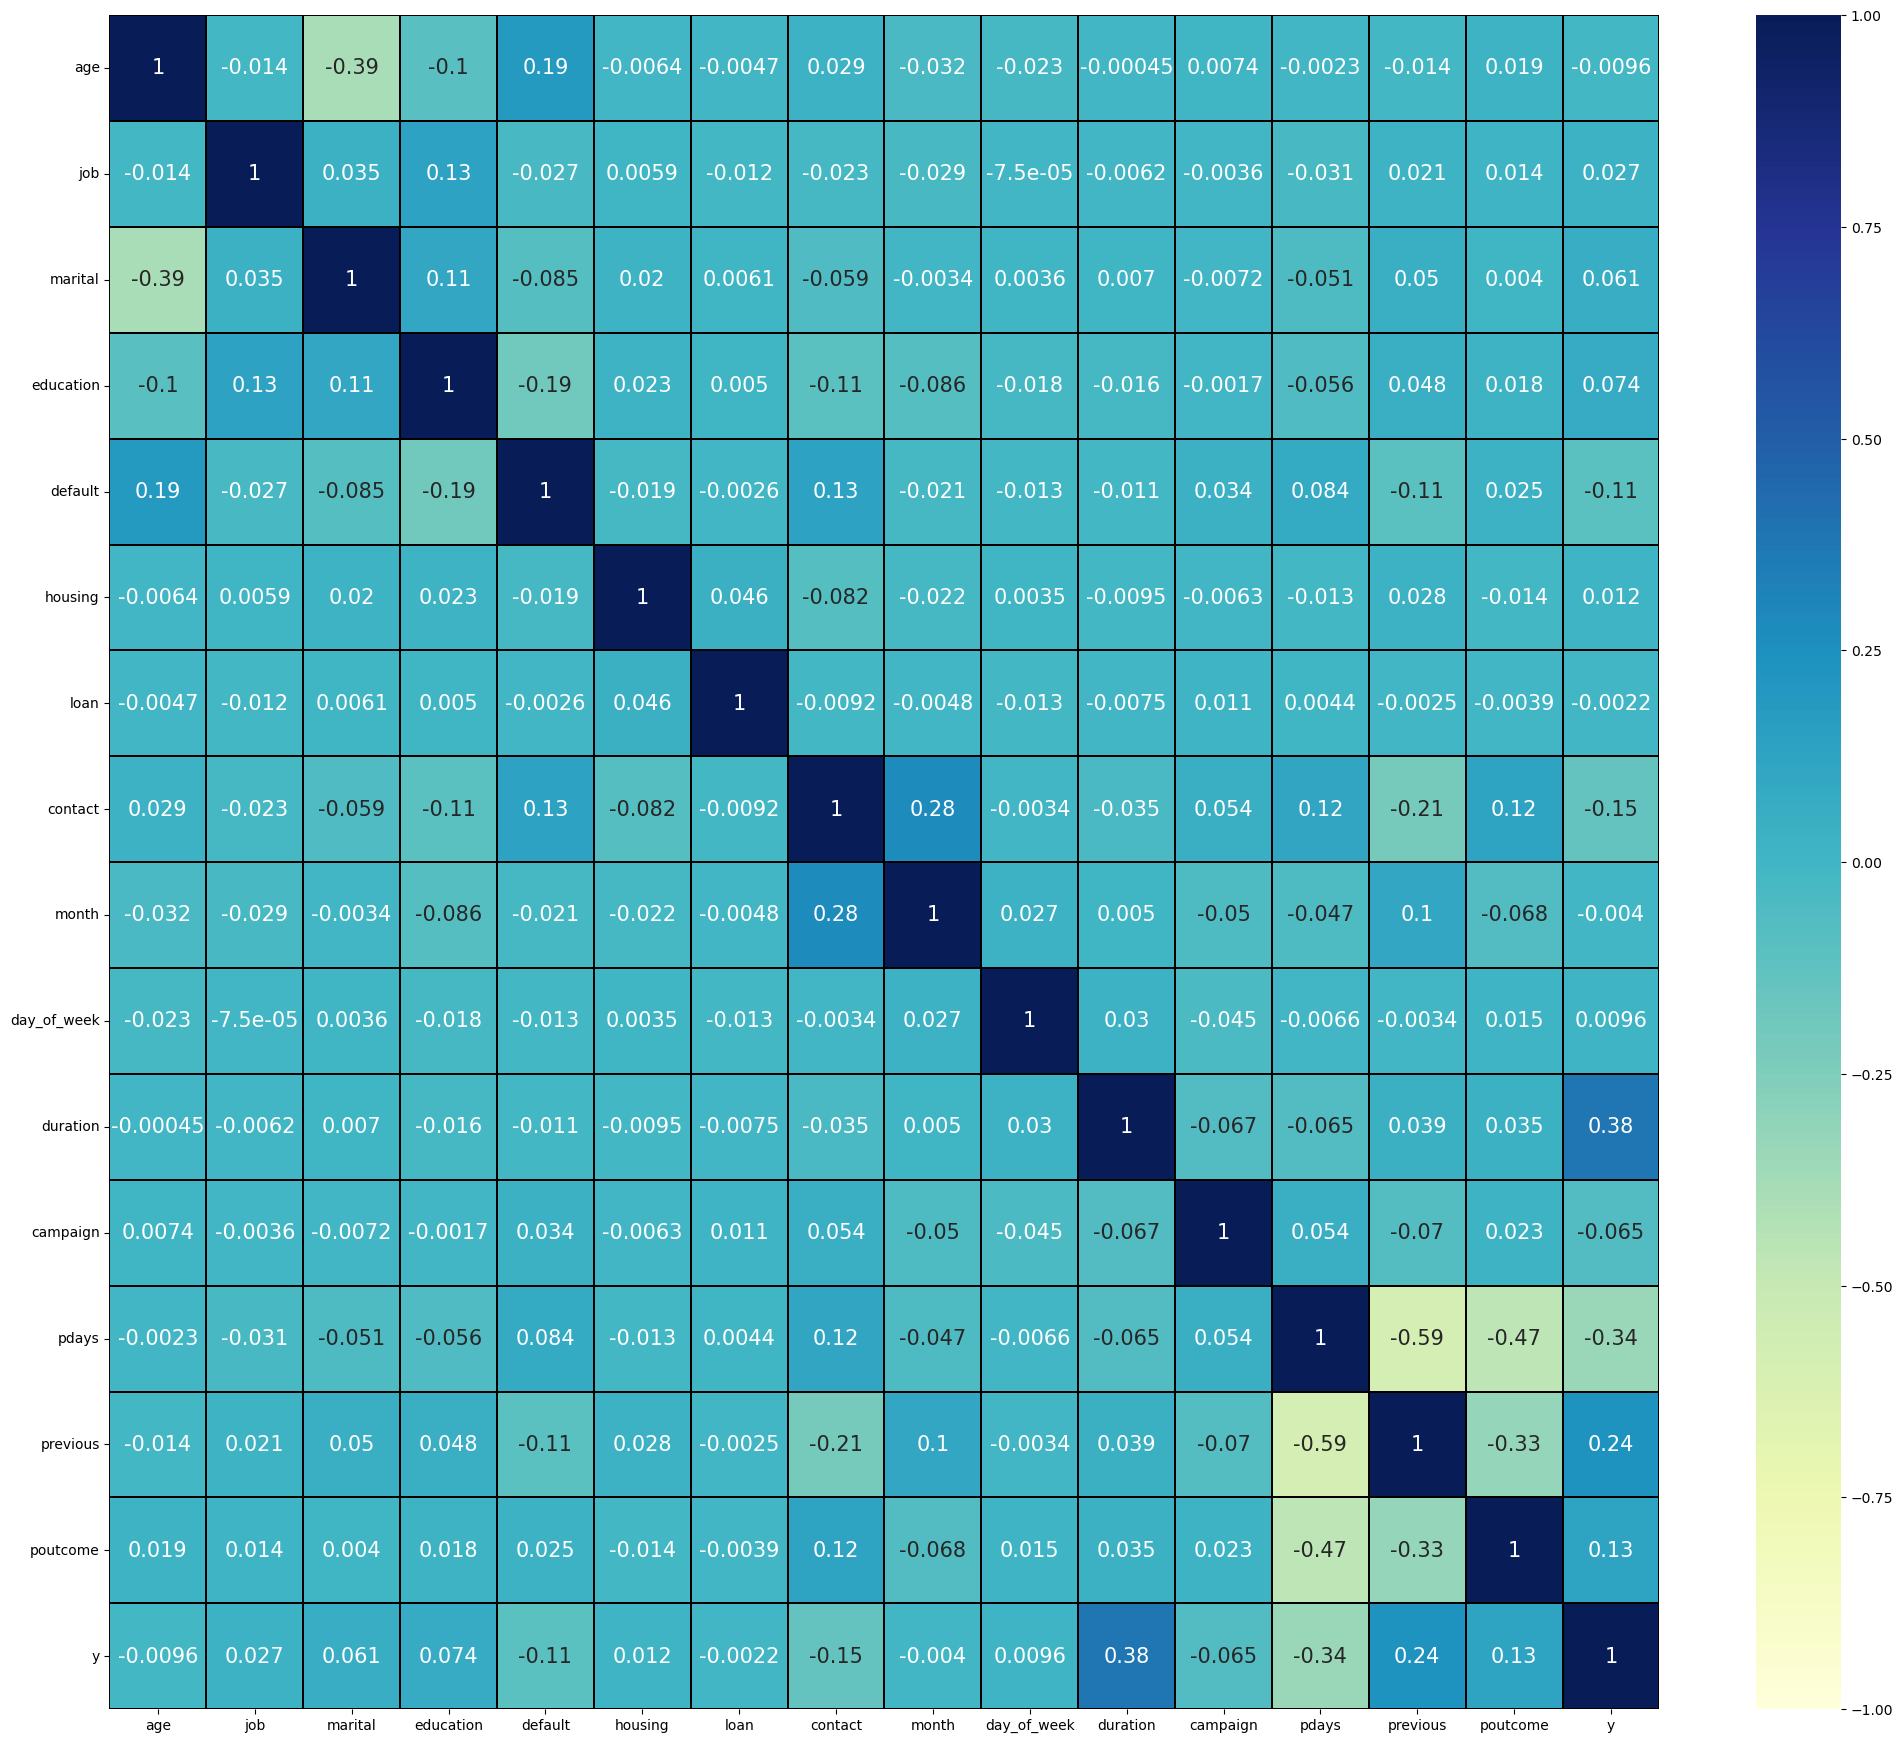

In [152]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

# Visualizing the correlation between label(y) and features using bar plot

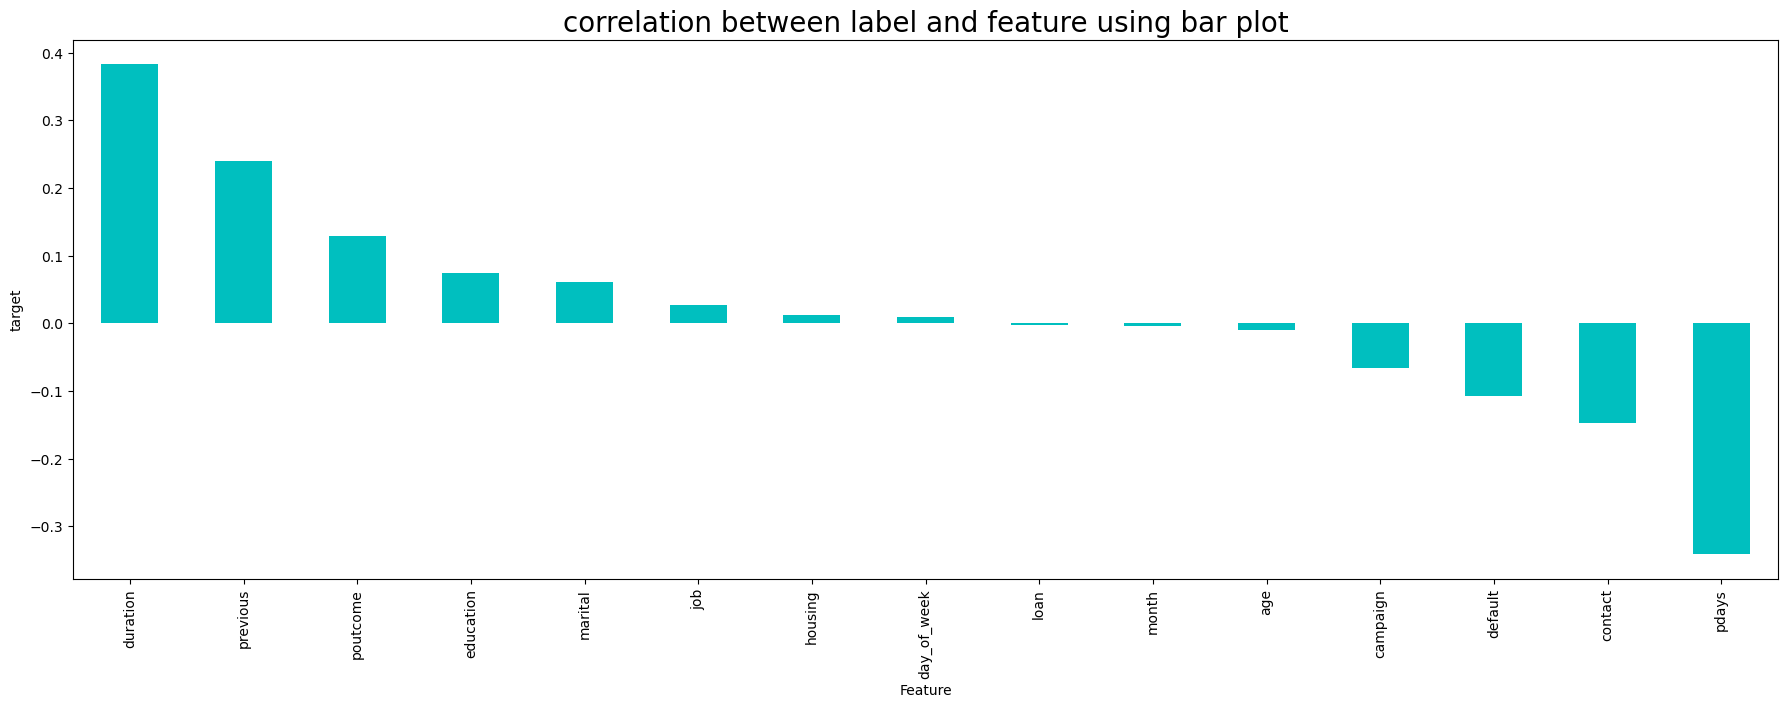

In [155]:
plt.figure(figsize=(22,7))
new_df.corr()['y'].sort_values(ascending=False).drop(['y']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

So, Here we can see that. 

     Positive Relation -> Duration, Previous, Poutcome,Education, Martial , job
     
     Negative Correlation -> Pdays, Contact, default , compaign, age .

# Model Building

In [156]:
x = new_df.drop("y", axis=1)
y = new_df["y"]

In [158]:
x.shape

(31310, 15)

In [159]:
y.shape

(31310,)

In [161]:
# Checking skewness after using yeo-johnson ethod
x.skew()

age            0.474248
job            0.453568
marital       -0.059043
education     -0.237707
default        1.427373
housing       -0.149027
loan           1.812056
contact        0.562739
month         -0.330693
day_of_week    0.012284
duration       1.593700
campaign       1.934818
pdays         -4.945533
previous       3.830300
poutcome      -0.892636
dtype: float64

Here we set a threshold for +-1. So her in 2 columns we have skewness. is [Previos and Pdays and campaign and duration ] Lets treat them by using Power Transformer Function

# Removing skewness using yeo_johnson method

In [164]:
skew = ["previous","poutcome",'duration','campaign']

In [165]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [166]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,previous,poutcome,duration,campaign
0,-0.400826,0.135681,0.257928,1.276207
1,2.493870,-2.253932,0.112440,0.302285
3,-0.400826,0.135681,-0.496221,0.302285
4,-0.400826,0.135681,0.898388,0.302285
5,-0.400826,0.135681,0.411492,0.302285


In [167]:
# Checking skewness after using yeo-johnson ethod
x.skew()

age            0.474248
job            0.453568
marital       -0.059043
education     -0.237707
default        1.427373
housing       -0.149027
loan           1.812056
contact        0.562739
month         -0.330693
day_of_week    0.012284
duration       0.003802
campaign       0.245604
pdays         -4.945533
previous       2.094126
poutcome       0.445997
dtype: float64

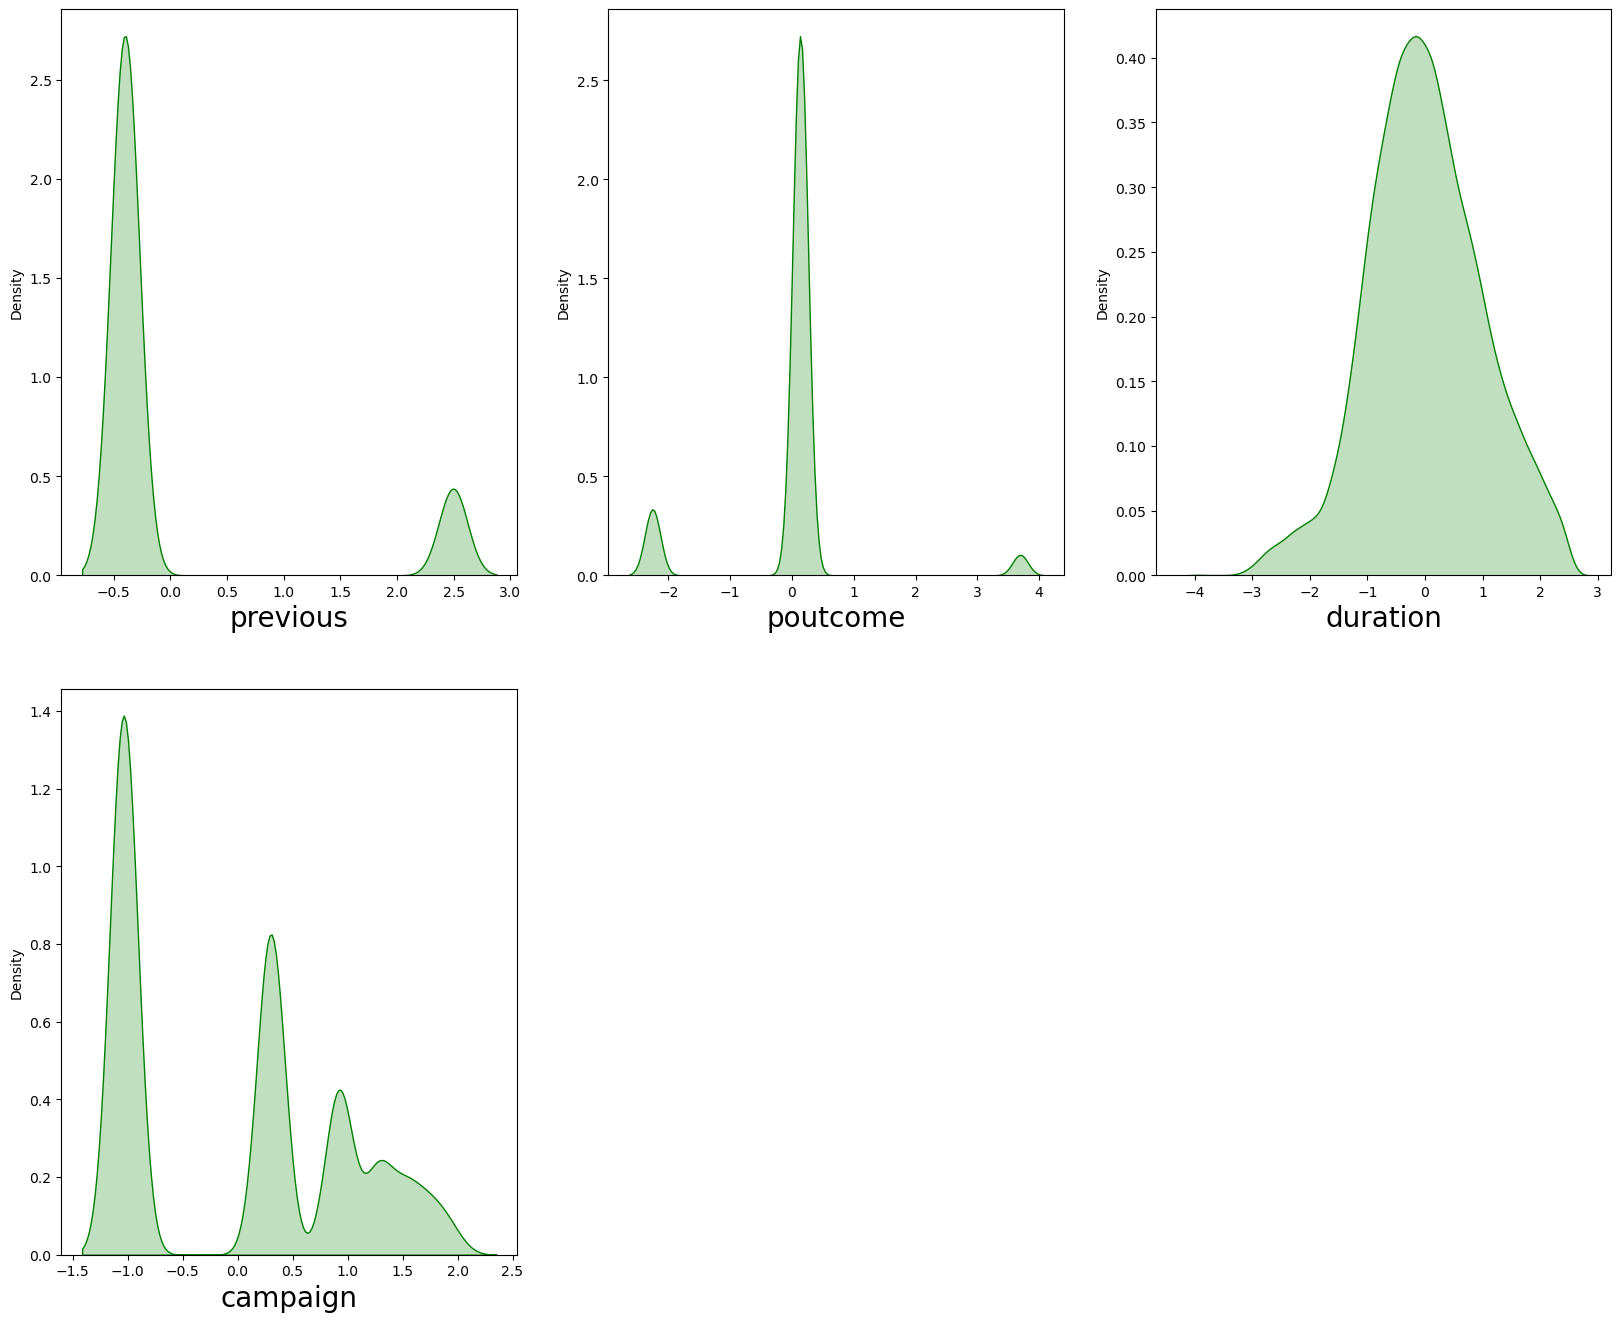

In [168]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

So, Here we can see that we got the almost normally distributed

# Resolving the class imbalance issue in label column

In [169]:
y.value_counts()

0    28141
1     3169
Name: y, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [171]:
! pip install imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [172]:
from imblearn.over_sampling import SMOTE

In [173]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
x,y= oversample.fit_resample(x,y)

MOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [174]:
y.value_counts()

0    28141
1    28141
Name: y, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Feature Scaling

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,0.890918,-0.758930,-0.235479,-0.908989,2.652272,-1.066282,-0.410679,-0.536799,1.173152,1.559909,-0.186465,1.464739,0.370363,-0.541696,-0.090354
1,-0.221598,-0.483738,-0.235479,1.018766,-0.376666,-1.066282,-0.410679,1.862894,1.173152,1.559909,-0.327624,0.417848,0.370363,1.861343,-1.771710
2,-0.314307,-1.034121,-0.235479,1.018766,-0.376666,1.019404,-0.410679,1.862894,0.768756,-0.658401,-0.918172,0.417848,0.370363,-0.541696,-0.090354
3,1.818015,0.341835,-1.857660,1.018766,-0.376666,-1.066282,-0.410679,-0.536799,-0.040036,0.820472,0.434936,0.417848,0.370363,-0.541696,-0.090354
4,-0.963275,-1.034121,1.386702,1.018766,-0.376666,-1.066282,-0.410679,-0.536799,-1.253224,1.559909,-0.037471,0.417848,0.370363,-0.541696,-0.090354


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Checking VIF values

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.285130,age
1,1.010512,job
2,1.263622,marital
3,1.075343,education
4,1.120095,default
5,1.008729,housing
6,1.007699,loan
7,1.235875,contact
8,1.096365,month
9,1.007521,day_of_week


So here we set threshold for 7 . There is  multicollinearity . probelm in 2 columns lets drop both of them.

In [177]:
x.drop(columns=['pdays','poutcome'],inplace=True)

In [178]:
#Lets check again the VIF Values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.283970,age
1,1.010459,job
2,1.262882,marital
3,1.073490,education
4,1.118741,default
5,1.008439,housing
6,1.007324,loan
7,1.235792,contact
8,1.096324,month
9,1.007415,day_of_week


Now we can see that we dont have any multicollinearity problem.

In [179]:
#Lets use any other feature selection technique
from sklearn.feature_selection import SelectKBest,f_classif

In [181]:
select_feature=SelectKBest(score_func=f_classif,k=12)
fit=select_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
column=pd.DataFrame(x.columns)

best_feature=pd.concat([column,score],axis=1)
best_feature.columns=['Feature','Score']
print(best_feature.nlargest(14,'Score'))

        Feature         Score
10     duration  23989.242053
7       contact  10403.737076
4       default   5735.812574
12     previous   4272.987948
11     campaign    754.949482
6          loan    675.830353
3     education    410.538071
9   day_of_week    355.693475
8         month    223.441683
5       housing    140.477912
2       marital     52.979239
0           age     48.126937
1           job     20.873558


So, Here all the columns suppporting for the model building . So here i am not going to delete any columns. lets move foreward to Model Building.

# Model Building

In [208]:
#Lets create with LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

In [193]:
#Lets make one fucntion to check accuracy again and again
def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("======================Training Score===================")
        print("Accuracy Score  ==> ",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=clf.predict(x_test)
        print("======================Testing Score====================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred))
        print("Classification Report==> ",classification_report(y_test,pred))
        print("Confusion Matrix==> ",confusion_matrix(y_test,pred))
        cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
        print("Cross Validation Score:", cv_score)

In [192]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the Classification  is :- {classification_report(y_test,y_pred)}")
    print(f" At random state {i} , the Confusion matrix is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8297390338700722
 At random state 0 , the testing accuracy is :- 0.8323709691747357
 At random state 0 , the Classification  is :-               precision    recall  f1-score   support

           0       0.85      0.81      0.83      5575
           1       0.82      0.86      0.84      5682

    accuracy                           0.83     11257
   macro avg       0.83      0.83      0.83     11257
weighted avg       0.83      0.83      0.83     11257

 At random state 0 , the Confusion matrix is :- [[4507 1068]
 [ 819 4863]]


 At random state 1 , the testing accuracy is :- 0.8302720710716269
 At random state 1 , the testing accuracy is :- 0.828639957359865
 At random state 1 , the Classification  is :-               precision    recall  f1-score   support

           0       0.85      0.80      0.83      5703
           1       0.81      0.85      0.83      5554

    accuracy                           0.83     11257
   macro avg     

In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=52)

In [195]:
lr.fit(x_train,y_train)

LogisticRegression()

In [196]:
metrics_score(lr,x_train,x_test,y_train,y_test,train=True)
metrics_score(lr,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.8315158245419212
======================Testing Score====================
Accuracy Score==>   0.8255307808474727
Classification Report==>                precision    recall  f1-score   support

           0       0.84      0.80      0.82      5595
           1       0.81      0.85      0.83      5662

    accuracy                           0.83     11257
   macro avg       0.83      0.83      0.83     11257
weighted avg       0.83      0.83      0.83     11257

Confusion Matrix==>  [[4469 1126]
 [ 838 4824]]
Cross Validation Score: 82.87200323084132


# Lets do Hyperparameter Tuning

In [197]:
from sklearn.model_selection import GridSearchCV

In [200]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [201]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [202]:
best_clf = clf.fit(x,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [203]:
best_clf.best_estimator_

LogisticRegression(C=0.0018329807108324356, solver='liblinear')

In [204]:
css=LogisticRegression(C=0.0018329807108324356, solver='liblinear')

In [206]:
css.fit(x_train,y_train)

LogisticRegression(C=0.0018329807108324356, solver='liblinear')

In [207]:
metrics_score(css,x_train,x_test,y_train,y_test,train=True)
metrics_score(css,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.831493614658523
======================Testing Score====================
Accuracy Score==>   0.8254419472328329
Classification Report==>                precision    recall  f1-score   support

           0       0.85      0.79      0.82      5595
           1       0.81      0.86      0.83      5662

    accuracy                           0.83     11257
   macro avg       0.83      0.83      0.83     11257
weighted avg       0.83      0.83      0.83     11257

Confusion Matrix==>  [[4428 1167]
 [ 798 4864]]
Cross Validation Score: 82.93241008879637


In [219]:
import pickle
filename=('Pranathi Logistic Regression Project 2.0')
pickle.dump(css,open(filename,'wb'))

# Conclusion

In [226]:
loaded_model=pickle.load(open('Pranathi Logistic Regression Project 2.0','rb'))
result=css.score(x_test,y_test)
print(result*100)

82.5441947232833


In [227]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,11247,11248,11249,11250,11251,11252,11253,11254,11255,11256
Predicted,1,1,1,1,1,0,1,0,0,0,...,1,1,1,0,1,0,0,1,0,1
Original,0,0,1,0,0,1,1,0,1,1,...,1,0,0,1,0,0,1,0,1,0


In [228]:
#Intern at Pranathi 
#Student of DataTrained - Saurav
#Date - 5- April-2023
#Time - 13:48